# NAVER 뉴스 데이터를 이용하여서 데이터 추출하기

## 이 주제를 정한 이유

NAVER에서 언론사들이 다 뉴스로 게시하는 우리 사회를 통해서 기자들이 다 제목과 내용이 서로 유사한 내용을 소재로 연관되어서 기사를 쓰지만, 다 제목과 내용의 연관성과 신뢰성이 타당할까를 의문점을 게시하게 되었습니다. 그래서 Naver라는 데이터를 직접 데이터를 추출하여 데이터를 분석하고 이를 결과로 어떠한 것을 알게 되었는지의 과정을 해야 겠다고 결심하게 되었습니다.

## 이 주제를 쓰기 위해서 어떠한 과정과 자료들을 매개로 데이터을 사용하게 되었을까?

데이터라는 작업을 이용하는 과정이기 때문에 지금 이 Python이라는 코딩언어를 이용하여 네이버 뉴스 웹을 크롤링으로 데이터를 추출해야 겠음을 알게 되었습니다. 그리고 그 데이터를 이용하여서 데이터프레임을 생성시킨 후 이를 내용과 제목에 있는 한글 구성요소들을 단어 전처리를이용하여서 이 구성요소 단어가 제목에는 몇개의 구성요소가 있고 내용에는 몇개의 구성요소가 있는지를 수학에서 나온 행렬들을 사용하여서 표현하고, 이를 TF-IDF라는 것을 이용해서 데이터들을 수학 행렬로 만들게 되었습니다. 그리고, 이 만들어진 제목과 내용의 행렬들을 서로 유사도가 있는지 확인하기위해서 COSINE-SIMILARITY를 이용하여서 거의 벡터의 연산으로 얼마나 유사한지에 대한 비율을 만들고, 이를 시각화하면서 뉴스 데이터들의 관계를 분석해 보았습니다.

## References

데이터들을 분석하는 데에 있어서 단어 전처리를 하는 자연어 처리를 할 수 있는 오픈소스를 매개로 추출하였습니다. Github을 이용해서 소스 파일들을 모듈화하고, 이를 활용하여서 뉴스 데이터의 분석에 쓰게 되었습니다.
(오픈소스 출처: https://github.com/ukairia777/tensorflow-nlp-tutorial)

## 데이터 소스 코드 만들기

### 웹 크롤링한 네이버 뉴스 데이터프레임 읽기

beautifulsoup, requests, pandas 모듈이용하기

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from tqdm import tqdm

네이버에서 뉴스 추출한 자료를 이용하여서 뉴스별 데이터프레임 부르기

In [2]:
# chosun_eilbo_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\chosun_eilbo.csv', encoding='utf-8', index_col=False)
# korean_economy_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\korean_economy.csv', encoding='utf-8', index_col=False)
# mail_economy_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\mail_economy.csv', encoding='utf-8', index_col=False)
# midlle_eilbo_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\middle_eilbo.csv', encoding='utf-8', index_col=False)
# money_today_database = pd.read_csv(r'C:\bigdata_git\bigdata_thunder\bigdata1\money_today.csv', encoding='utf-8', index_col=False)
chosun_eilbo_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\chosun_eilbo.csv', encoding='utf-8', index_col=False)
korean_economy_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\korean_economy.csv', encoding='utf-8', index_col=False)
mail_economy_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\mail_economy.csv', encoding='utf-8', index_col=False)
midlle_eilbo_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\middle_eilbo.csv', encoding='utf-8', index_col=False)
money_today_database = pd.read_csv(r'C:\Users\user\Documents\github\bigdata_thunder\bigdata1\money_today.csv', encoding='utf-8', index_col=False)

데이터프레임에 있는 오류가 있는 값을 제거하기

In [3]:
chosun_eilbo_database = chosun_eilbo_database.dropna()
chosun_eilbo_database

title  \
0            판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…   
1              이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”   
2          박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”   
3                 野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드   
4           “먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성   
...                                          ...   
27549               [선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’   
27550       [김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리   
27551                    [차현진의 돈과 세상] [94] 말 한마디   
27552  [김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑   
27553         [수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!   

                                                 content  \
0      통통한 몸집과 어울리지 않게 대나무를 주식으로 하는 판다. 이런 판다의 독특한 식성...   
1      “가세연의 이준석 녹취는 일부 삭제된 것” 경기중앙지방변호사회가 한 보수단체가 제기...   
2      비대위원장직 자진사퇴 후 한 달 만에 공개행사 참석 이재명 전당대회 출마와 민형배 ...   
3      강병원 “진영 논리서 벗어나야” 박용진 “상식 복원하는 게 혁신” 꼼수 탈당한 민형...   
4      시누이 부부가 먹을 음식에 유독성 물질을 넣은 30대 여성이 특수상해 혐의로 경찰에...   
...                                                  ...   
27549  이재명 대표는 그의 유동규 발언이 이 폭풍을 몰고온 나비효과라는 것을 이해하지 못할...   
27550  집에 돌아온 체르바코프는 아내에게 자신의 무례한 행동에 대해 이야기했다. 그가 보기...   
27551  말 한마디가 세상을 뒤흔든다. 1997년 11월 외환 위기의 폭풍우가 몰려올 때 새...   
27552  불교 사진 선구자 관조 스님 16주기...제자 승원 스님 가평 백련사에 파격 사리탑...   
27553  ‘가장 인간적인 유인원’으로 알려진 보노보 동족 포식 현상 잇따라 목격돼 고등동물에...   

                                                     url  
0      https://n.news.naver.com/mnews/article/023/000...  
1      https://n.news.naver.com/mnews/article/023/000...  
2      https://n.news.naver.com/mnews/article/023/000...  
3      https://n.news.naver.com/mnews/article/023/000...  
4      https://n.news.naver.com/mnews/article/023/000...  
...                                                  ...  
27549  https://n.news.naver.com/mnews/article/023/000...  
27550  https://n.news.naver.com/mnews/article/023/000...  
27551  https://n.news.naver.com/mnews/article/023/000...  
27552  https://n.news.naver.com/mnews/article/023/000...  
27553  https://n.news.naver.com/mnews/article/023/000...  

[25844 rows x 3 columns]

In [4]:
korean_economy_database = korean_economy_database.dropna()
korean_economy_database

title  \
0      SRT 탈선 구간 심야 복구…국토부 "2일 오전 9시 정상화 예상"   
1        '트윗 중독' 머스크, 열흘간 이례적 침묵…2017년 이후 처음   
2          이근 "한국 고교생, 방학 맞아 우크라이나 들어와…미친 짓"   
3         美 델타항공 조종사들 뿔났다…"파업 준비됐다" 업무 과중 호소   
4          '가상화폐 여왕'의 몰락…5조 사기로 FBI 수배명단 올랐다   
...                                      ...   
52454     [사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당   
52455          [다산칼럼] '기대인플레이션' 정확한 측정이 중요하다   
52456                [포토] 라필루스 샨티, '매력적인 미소'   
52457                [시론] 북한의 우발적 핵 공격에 대비해야   
52458                       [한경에세이] 크리에이터 세상   

                                                 content  \
0      대전 조차장역 인근에서 수서행 SRT 열차 탈선 사고가 발생한 가운데 2일 오전 9...   
1      일론 머스크 테슬라 최고경영자(CEO)가 열흘 가까이 트윗을 중단했다. 1일(현지시...   
2      우크라이나 국제의용군으로 합류한 뒤 귀국한 해군특수전전단(UDT/SEAL) 대위 출...   
3      미국 델타항공 조종사들이 처우개선을 요구하는 시위에 나섰다. 이들은 자신들의 요구가...   
4      '가상화폐 여왕'이라는 별칭으로 알려진 국제사기범 루자 이그나토바가 미국 연방수사국...   
...                                                  ...   
52454  더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 ...   
52455  현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불...   
52456  그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M...   
52457  컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한...   
52458  K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 ...   

                                                     url  
0      https://n.news.naver.com/mnews/article/015/000...  
1      https://n.news.naver.com/mnews/article/015/000...  
2      https://n.news.naver.com/mnews/article/015/000...  
3      https://n.news.naver.com/mnews/article/015/000...  
4      https://n.news.naver.com/mnews/article/015/000...  
...                                                  ...  
52454  https://n.news.naver.com/mnews/article/015/000...  
52455  https://n.news.naver.com/mnews/article/015/000...  
52456  https://n.news.naver.com/mnews/article/015/000...  
52457  https://n.news.naver.com/mnews/article/015/000...  
52458  https://n.news.naver.com/mnews/article/015/000...  

[50582 rows x 3 columns]

In [5]:
mail_economy_database = mail_economy_database.dropna()
mail_economy_database

title  \
0                     '문명특급' 수지 "데뷔작 '드림하이' 당시 기억 거의 없어"   
1                       '나혼산' 김해준, 야성미 자랑 "섹시한 돌쇠, 머슴같아"   
2                '문명특급' 재재, 수지와 함께 찍은 사진 공개 "맞팔한 사이" 너스레   
3      [종합] '닥터로이어' 소지섭, '父 죽음' 진실 알았다→ 신성록 "소지섭, 병원장...   
4            [종합]'왜 오수재인가' 서현진, 허준호 판 흔들었다→황인엽과 동거·애정 확인   
...                                                  ...   
54581             [사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야   
54582               대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]   
54583            [사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색   
54584                     [오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠   
54585                        [오늘의 MBN] 산에서 경마 중독 이겨낸 자연인   

                                                 content  \
0      '문명특급' 수지가 데뷔작 '드림하이'를 회상했다. 1일 방송된 SBS '문명특급'...   
1      김해준의 야성미에 무지개 회원들이 감탄했다. 1일 밤 방송된 MBC '나 혼자 산다...   
2      '문명특급' 재재가 수지와 '맞팔' 사이라고 밝혔다. 1일 방송된 SBS '문명특급...   
3      '닥터로이어' 소지섭이 아버지의 죽음에 대한 진실을 알았다. 1일 방송된 MBC 금...   
4      서현진이 이경영, 조영진, 허준호 등의 약점을 쥐면서 허준호가 짜놓은 판을 흔들었다...   
...                                                  ...   
54581  윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환...   
54582  더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 ...   
54583  시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에...   
54584  ■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가...   
54585  ■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연...   

                                                     url  
0      https://n.news.naver.com/mnews/article/009/000...  
1      https://n.news.naver.com/mnews/article/009/000...  
2      https://n.news.naver.com/mnews/article/009/000...  
3      https://n.news.naver.com/mnews/article/009/000...  
4      https://n.news.naver.com/mnews/article/009/000...  
...                                                  ...  
54581  https://n.news.naver.com/mnews/article/009/000...  
54582  https://n.news.naver.com/mnews/article/009/000...  
54583  https://n.news.naver.com/mnews/article/009/000...  
54584  https://n.news.naver.com/mnews/article/009/000...  
54585  https://n.news.naver.com/mnews/article/009/000...  

[52703 rows x 3 columns]

In [6]:
midlle_eilbo_database = midlle_eilbo_database.dropna()
midlle_eilbo_database

title  \
0             유나양 마지막길, 유족은 오지 않았다…장례식 없이 화장   
2         박지원 "대선·지선 승리 이끌고 손절 당해…이준석 안타깝기도"   
3               [그림사설] 검수완박 논란, 헌재가 빨리 답 내놔야   
4        러 "러-독 연결 가스관 10여일 간 잠정폐쇄…기술 점검 차원"   
5       6가지 앎이 암 재발 막는다…'암완치 5년' 지나도 꼭 챙길 이것   
...                                      ...   
29008      감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”   
29009     홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험   
29010    국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다   
29011   상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”   
29012  여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”   

                                                 content  \
0      전남 완도 바다에서 숨진 채 발견된 조유나(10)양과 부모가 유족 없이 1일 화장됐...   
2      박지원 전 국정원장은 이준석 국민의힘 대표가 해외순방에서 돌아온 윤석열 대통령을 마...   
3                                         글=중앙일보 논설실 그림=   
4      러시아가 발트해를 통해 독일로 연결되는 '노르트 스트림' 가스관을 이달 중순 10여...   
5      통상 암 치료 후 5년이 지나면 완치 판정을 받는다. 이후 환자들은 관리에 소홀한 ...   
...                                                  ...   
29008  감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하...   
29009  40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍...   
29010  이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남...   
29011  최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대...   
29012  국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 ...   

                                                     url  
0      https://n.news.naver.com/mnews/article/025/000...  
2      https://n.news.naver.com/mnews/article/025/000...  
3      https://n.news.naver.com/mnews/article/025/000...  
4      https://n.news.naver.com/mnews/article/025/000...  
5      https://n.news.naver.com/mnews/article/025/000...  
...                                                  ...  
29008  https://n.news.naver.com/mnews/article/025/000...  
29009  https://n.news.naver.com/mnews/article/025/000...  
29010  https://n.news.naver.com/mnews/article/025/000...  
29011  https://n.news.naver.com/mnews/article/025/000...  
29012  https://n.news.naver.com/mnews/article/025/000...  

[27233 rows x 3 columns]

In [7]:
money_today_database = money_today_database.dropna()
money_today_database

title  \
0          현대차 노조 71.8% "파업 찬성"...4년만에 파업 벌어질까   
1           '재결합 불발' 일라이, 지연수에 "친구로 지낼 마음 없어?"   
2      이혼한 아내에게 재산 분할 안 하려고…2억원 건물 처분한 60대, 실형   
3                    [속보]뉴욕증시 하락출발...나스닥 0.4%↓   
4       '트랜스젠더 유튜버' 풍자 "신검 받다 그 자리서 울어"…무슨 사연?   
...                                        ...   
49205                         [광화문]청문회 대상은 국회다   
49206                     머니투데이 오프라인 헤드라인-26일자   
49207   [사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다   
49208                       [MT시평]금융업의 본질은 신뢰다   
49209       [투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견   

                                                 content  \
0      현대차 노조가 파업을 하는데 뜻을 모았다. 2018년 이후 4년만에 현대차 노조의 ...   
1      그룹 '유키스' 출신 일라이가 그의 전 아내 지연수에게 친구로 지내고 싶다는 뜻을 ...   
2      이혼한 아내에게 재산이 넘어갈 것을 우려해 건물을 처분한 60대가 실형을 선고받았다...   
3      뉴욕증시가 하락 출발했다. 1일(현지시간) 뉴욕증시에서 다우지수와 S&P500지수는...   
4      트랜스젠더 유튜버 풍자(본명 윤보미)가 과거 성전환 수술 후 받은 신체검사에서 '현...   
...                                                  ...   
49205  판이 바뀌었다. 대선을 거치며 이런저런 '사법 리스크'에 노출됐던 이재명 더불어민주...   
49206  "대형증권사, 제2 채안펀드 1조 만들라" 촉법소년 '만 13세' 하향…"더 낮춰야...   
49207  34만 7675건. 2020년 한해 동안 국내에서 발생한 사기 범죄 건수다. 한 시...   
49208  동서증권이란 회사가 있었다. 외환위기 전에 업계 4위 정도 하던 곳인데 이 회사가 ...   
49209  지난 7월말 일본의 하기우다 고이치 경제산업상은 구글 본사를 시찰한 후 기자회견을 ...   

                                                     url  
0      https://n.news.naver.com/mnews/article/008/000...  
1      https://n.news.naver.com/mnews/article/008/000...  
2      https://n.news.naver.com/mnews/article/008/000...  
3      https://n.news.naver.com/mnews/article/008/000...  
4      https://n.news.naver.com/mnews/article/008/000...  
...                                                  ...  
49205  https://n.news.naver.com/mnews/article/008/000...  
49206  https://n.news.naver.com/mnews/article/008/000...  
49207  https://n.news.naver.com/mnews/article/008/000...  
49208  https://n.news.naver.com/mnews/article/008/000...  
49209  https://n.news.naver.com/mnews/article/008/000...  

[48975 rows x 3 columns]

## 깃허브 오픈소스 이용하기

### 토큰화로 바꾸는 파일 부르기

In [9]:
from tokenization import *  # 내용, 제목들을 토큰화하는 모듈
from remove_stopwords import *  # 내용, 제목에 필요없는 단어들을 제거하는 모듈
from regular_expression import *    # 내용, 제목을 정규화시키는 모듈
from text_preprocessing_tools_for_korean_text import *  # 내용, 제목에 있는 한글들을 전처리 시켜주는 모듈
from integer_encoding import *  # 내용과 제목을 인코딩하는 모듈
from kiwipiepy import Kiwi  # 키위 클래스 모듈로 단어 토큰화 모듈
from tf_idf import TfidfVectorizer, tfidf    # tf , tfidf로 행렬를 만드는 모듈

## TF-IDF를 이용하여 벡터화하기

In [10]:
kiwi = Kiwi()
def extract_noun_from_kiwi_analyzed(comment):
    temp_sentence = kiwi.analyze(comment)
    noun_list = [token.form for token in temp_sentence[0][0] if re.match('N', token.tag)]
    return noun_list

## 100개의 특정표본을 이용하여서 처리화하기

### 조선일보 100개의 표본 이용하기

제목 단어 토큰화하기

In [11]:
whole_title_noun = []
for chosun_title in chosun_eilbo_database.head(100)["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_title_noun.append(noun)
print(whole_title_noun)

['대나무', '이준석', '변호인', '변호사회', '박지현', '이광재', '시누이', '메탄올', '백악관', '귀국길', '지휘관', '오데사', '아파트', '쑥대밭', '목구멍', '길거리', '대통령', '지지율', '휠체어', '민주당', '이재명', '박지현', '포르노', '위원장', '성적표', '민노총', '녹취록', '서포터즈', '일요일', '아버지', '냉장고', '토요일', '이재명', '우크라', '의용군', '목소리', '구청장', '인터뷰', '오승록', '노원구', '일자리', '바이오', '구청장', '인터뷰', '박강수', '마포구청장', '구청장', '인터뷰', '송파구청', '아파트', '구청장', '인터뷰', '도봉구청', '도봉구', '오페라하우스', '넷플릭스', '창업자', '현대차', '지난달', '반도체', '시뮬레이션', '공무원', '크레인', '스타트업', '대전조차장역', '공무원', '스스로', '기록물', '김어준', '아이파크', '현대산업개발', '취임식', '단체장', '대우조선', '노동자', '이종호', '마지막', '장례식', '모정미씨', '지역민', '호민관', '성희롱', '한미일', '이문열', '연구소', '잿더미', '고등학생', '기증자', '김지수', '창신동', '쪽방촌', '디즈니', '다가구', '다세대', '임차인', '다단계', '조희팔', '사모당', '온라인', '코스피', '러시아', '민형배', '해외여행', '숭례문', '유가족', '어머니', '수면제', '바이든', '노룩악수', '조희연', '대립각', '대부업체', '대통령', '르메이에르', '입주자', '이준석', '대통령', '캐나다', '김건희', '휴가지', '네이버', '토트넘', '라인업']


내용 토큰화하기

In [12]:
whole_content_sentence_list = []
count = 1
for chosun_url in tqdm(chosun_eilbo_database.head(100)["url"]):
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    try:
        response_0 = requests.get(chosun_url, headers=headers)
    except OSError:
        print("OS 연결을 끊켰습니다.")
        whole_content_sentence_list.append("None")
    except ProtocolError:
        print("프로토콜 연결이 끊켰습니다.")
        whole_content_sentence_list.append("None")
    except ConnectionError:
        print("연결이 끊켰습니다.")
        whole_content_sentence_list.append("None")
        soup_0 = BeautifulSoup(response_0.text, 'html.parser')
        content_0_data = soup_0.find('div', {"id" : "dic_area"})
        whole_content_sentence_list.append(content_0_data)
    else:
        soup_0 = BeautifulSoup(response_0.text, 'html.parser')
        content_0_data = soup_0.find('div', {"id" : "dic_area"})
        try:
            content_0_data = content_0_data.get_text().strip()
        except AttributeError:
            whole_content_sentence_list.append("None")
        else:
            content_0_data = content_0_data.replace('\n','').replace('\t','')
            new_content_0_data = content_0_data.replace(" ", '')
            kospacing_new_content_0_data = spacing(new_content_0_data) 
            words_data = twitter.morphs(kospacing_new_content_0_data)
            with open("C:\\Users\\user\\Documents\\github\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
                stopwords_list = stopwords.read().split('\n')
            new_content_1 ='' 
            for i in korean_change_no_stop_words(words_data, stopwords_list):
                new_content_1 += i
            tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
            # tokenizer3_content_2 = RegexpTokenizer('')
            # print(tokenizer3_content_1.tokenize(new_content_1))
            regular_expression_sentence = ''
            for expression in tokenizer3_content_1.tokenize(new_content_1):
                regular_expression_sentence += expression
            whole_content_sentence_list.append(regular_expression_sentence)
    
    # print()
    # count += 1
# print(whole_content_sentence_list)

1/1 [==============================] - 0s 26ms/step


In [13]:
whole_content_noun = []
count = 1
for content in whole_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_content_noun.append(noun)
                
# 내용에 있는 구성 단어들 중 21개의 단어 추출
print(whole_content_noun[0:21])

1/1 [==============================] - 0s 25ms/step
['대나무', '로스앤젤레스', '자연사', '박물관', '왕샤오밍', '자이언트', '락토스', '대나무', '윈난성', '자오퉁시', '락토스', '자이언트', '손가락', '뉴시스', '대나무', '전문가', '그동안', '현대판', '대나무', '몸무게', '갈고리']


제목 내용 토큰화된 것들 결합하기

In [14]:
title_content_vocab = list(set(whole_title_noun + whole_content_noun))
title_content_vocab.sort()
# 제목과 내용 토큰화한 것을 결합한 단어 리스트 중 21개의 단어 추출
print(title_content_vocab[0:21])

['.굴벤키', '.기아', '.나토', '.내수판대', '‘플미충', '가드지비치가드', '가드지예프', '가락시장', '가맹점', '가성비', '가운데', '가정생활', '가치세', '가해자', '각계각층', '간담회', '갈고리', '갈무리', '감독관', '감독원장', '감사원']


제목 TF, TF-IDF이용해서 벡터행렬화하기

In [15]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_eilbo_database.head(100)["title"])):
  result.append([])
  try:
    d = chosun_eilbo_database.head(100)["title"][i]
  except KeyError:
    for j in range(len(title_content_vocab)):
      result[-1].append(0)
  else:
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(tfidf(t, d))

# len(result)
title_tfidf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
title_tfidf_

.굴벤키  .기아  .나토  .내수판대  \
title                                                                       
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                  0.0  0.0  0.0    0.0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                    0.0  0.0  0.0    0.0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                0.0  0.0  0.0    0.0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                       0.0  0.0  0.0    0.0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                 0.0  0.0  0.0    0.0   
...                                                  ...  ...  ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”               0.0  0.0  0.0    0.0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                      0.0  0.0  0.0    0.0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다               0.0  0.0  0.0    0.0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]   0.0  0.0  0.0    0.0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”       0.0  0.0  0.0    0.0   

                                                    ‘플미충  가드지비치가드  가드지예프  \
title                                                                      
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                  0.0      0.0    0.0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                    0.0      0.0    0.0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                0.0      0.0    0.0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                       0.0      0.0    0.0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                 0.0      0.0    0.0   
...                                                  ...      ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”               0.0      0.0    0.0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                      0.0      0.0    0.0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다               0.0      0.0    0.0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]   0.0      0.0    0.0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”       0.0      0.0    0.0   

                                                    가락시장  가맹점  가성비  ...  흔린다  \
title                                                               ...        
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                  0.0  0.0  0.0  ...  0.0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                    0.0  0.0  0.0  ...  0.0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                0.0  0.0  0.0  ...  0.0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                       0.0  0.0  0.0  ...  0.0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                 0.0  0.0  0.0  ...  0.0   
...                                                  ...  ...  ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”               0.0  0.0  0.0  ...  0.0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                      0.0  0.0  0.0  ...  0.0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다               0.0  0.0  0.0  ...  0.0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]   0.0  0.0  0.0  ...  0.0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”       0.0  0.0  0.0  ...  0.0   

                                                    흥행작  희소식  히로유키  히어로  히타치  \
title                                                                          
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                 0.0  0.0   0.0  0.0  0.0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                   0.0  0.0   0.0  0.0  0.0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”               0.0  0.0   0.0  0.0  0.0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                      0.0  0.0   0.0  0.0  0.0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                0.0  0.0   0.0  0.0  0.0   
...                                                 ...  ...   ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”              0.0  0.0   0.0  0.0  0.0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                     0.0  0.0   0.0  0.0  0.0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다              0.0  0.0   0.0  0.0  0.0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]  0.0  0.0   0.0  0.0  0.0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”      0.0  0.0

제목 tf, tf-idf를 csv에다가 저장하기

In [16]:
title_tfidf_.to_csv("title_tfidf.csv", encoding='utf-8-sig')

내용 추출한 것을 tf-idf, tf을 이용하여서 벡터행렬화하기

In [17]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_content_sentence_list)):
  result.append([])
  try:
    d = whole_content_sentence_list[i]
  except KeyError:
    for j in range(len(title_content_vocab)):
        result[-1].append(0)
  else:
    for j in range(len(title_content_vocab)):
      t = title_content_vocab[j]
      result[-1].append(int(tfidf(t, d)))

# len(result)
content_tfidf_ = pd.DataFrame(result, columns=title_content_vocab, index=chosun_eilbo_database.head(100)["title"])
content_tfidf_

.굴벤키  .기아  .나토  .내수판대  \
title                                                                       
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                    0    0    0      0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                      0    0    0      0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                  0    0    0      0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                         0    0    0      0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                   0    0    0      0   
...                                                  ...  ...  ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                 0    0    0      0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                        0    0    0      0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                 0    0    0      0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]     0    0    0      0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”         0    0    0      0   

                                                    ‘플미충  가드지비치가드  가드지예프  \
title                                                                      
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                    0        0      0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                      0        0      0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                  0        0      0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                         0        0      0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                   0        0      0   
...                                                  ...      ...    ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                 0        0      0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                        0        0      0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                 0        0      0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]     1        0      0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”         0        0      0   

                                                    가락시장  가맹점  가성비  ...  흔린다  \
title                                                               ...        
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                    0    0    0  ...    0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                      0    0    0  ...    0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                  0    0    0  ...    0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                         0    0    0  ...    0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                   0    0    0  ...    0   
...                                                  ...  ...  ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                 0    0    0  ...    0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                        0    0    0  ...    0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                 0    0    0  ...    0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]     0    0    0  ...    0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”         0    0    0  ...    0   

                                                    흥행작  희소식  히로유키  히어로  히타치  \
title                                                                          
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                   0    0     0    0    0   
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                     0    0     0    0    0   
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”                 0    0     0    0    0   
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                        0    0     0    0    0   
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                  0    0     0    0    0   
...                                                 ...  ...   ...  ...  ...   
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”                0    0     0    0    0   
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                       0    0     0    0    0   
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다                0    0     0    0    0   
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]    0    0     0    0    0   
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”        0    0

In [18]:
content_tfidf_.to_csv("content_tfidf.csv", encoding='utf-8-sig')

cos_simliarity를 이용해서 벡터행렬화하기

In [19]:
import numpy as np

In [27]:
cos_sim_tfidf = (content_tfidf_.values @ title_tfidf_.values.T).sum(1)/(np.linalg.norm(title_tfidf_.values) * np.linalg.norm(content_tfidf_.values))
print(cos_sim_tfidf)

[0.00335335 0.0149038  0.02719943 0.01043266 0.00335335 0.00484373
 0.01043266 0.02608165 0.0149038  0.01639418 0.04024025 0.0074519
 0.04098544 0.01155044 0.02161051 0.00260816 0.00596152 0.01080525
 0.01006006 0.02310089 0.0074519  0.00074519 0.01527639 0.00856968
 0.00521633 0.01229563 0.         0.00521633 0.00633411 0.
 0.00372595 0.00111778 0.00037259 0.00670671 0.00447114 0.06073298
 0.04992772 0.03800468 0.06147817 0.06594931 0.04098544 0.0074519
 0.00968747 0.00931487 0.00558892 0.00223557 0.00037259 0.029435
 0.01751196 0.00149038 0.00111778 0.02012013 0.00931487 0.00372595
 0.01564899 0.00186297 0.00260816 0.00335335 0.01043266 0.03055279
 0.00521633 0.         0.01304082 0.00447114 0.01043266 0.01229563
 0.01602158 0.02272829 0.00186297 0.00484373 0.00260816 0.00037259
 0.00968747 0.00894228 0.         0.         0.         0.00521633
 0.00074519 0.0074519  0.         0.00260816 0.01900234 0.00633411
 0.00223557 0.00521633 0.07265601 0.00596152 0.00596152 0.01564899
 0.0212

In [28]:
cos_sim_tfidf_ =pd.DataFrame(cos_sim_tfidf, index = chosun_eilbo_database.head(100)["title"])
cos_sim_tfidf_

0
title                                                       
판다는 언제부터 대나무만 먹었을까? 600만년 전 화석 봤더니…                 0.003353
이준석 변호인 징계요청 기각… 경기변호사회 “수사결과 봐야”                   0.014904
박지현 “이광재가 내 배후? 어리면 배후 있을 거라는 꼰대식 사고”               0.027199
野 당권주자들 “검수완박 성급했다” 이제와서 반성 모드                      0.010433
“먹으니 시야 흐려져” 시누이 부부 음식에 메탄올 넣은 30대여성                0.003353
...                                                      ...
여당서도 김승희 반대 목소리…성일종 “후원금 논란, 바람직하지 않아”              0.007079
박지원 “尹 첫 해외순방 80점, 김건희 여사는 90점”                     0.016394
여름 휴가지 맛집 일일이 안 찾아도 네이버 AI가 한꺼번에 검색해준다              0.000000
흠뻑쇼 120만원·토트넘 3700만원…‘암표 거지와의 전쟁’ 아무 소용없는 이유 [라인업]  0.010805
상반기 美 증시, 52년 만의 최대 하락 폭... 닥터 둠 “50% 더 떨어질 것”      0.000000

[100 rows x 1 columns]

cos_similarity를 한 결과 행과 열 분석

In [29]:
cos_sim_tfidf.shape

(100,)

In [30]:
cos_sim_tfidf_.to_csv("tfidfcos_sim.csv", encoding='utf-8-sig')

## 전체 표본 이용하여서 tf-idf 데이터 유사도 추출하기

### 조선일보의 데이터 유사성 구하기

제목 추출하기

In [59]:
whole_chosun_title_noun = []
for chosun_title in chosun_eilbo_database.tail(1000)["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_chosun_title_noun.append(noun)

조선일보 url 추출하여서 내용 추출하기 (아까 100개 추출하였을 때에는 2분만에 추출 성공했지만, 이 조선일보 코드하나를  작동 했음에도 계속 작동중이며, oserror, connectionerror 예외처리를 했음에도 계속 13시간 이상 부팅중이어서... 결국 전체의 결과를 보지를 못하였다... 막상 예외처리를 하다보니 에러 메시지를 나온 것도 있었지만... 데이터 추출을 하는데 한계가 있었음을 느끼게 되었습니다. 그리고 그것을 작동하는 동안 다른 프로그램과 이 프로그램도 계속 렉이라는 오류가 일어나게 되어서.. 일부만 추출하는 과정만 된다는 것을 알게되었습니다... ㅠㅠ)

In [69]:
whole_chosun_content_sentence_list = []
count = 1
for chosun_url in tqdm(chosun_eilbo_database.tail(100)["url"]):
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    try:
        response_0 = requests.get(chosun_url, headers=headers)
    except OSError:
        print("OS 연결에서 응답이 되지 않습니다.")
        whole_chosun_content_sentence_list.append("None")
    except ProtocolError:
        print("연결이 끊켰습니다.")
        whole_chosun_content_sentence_list.append("None")     
    except ConnectionError:
        print("연결이 끊켰습니다.")
        whole_chosun_content_sentence_list.append("None")
    else:
        soup_0 = BeautifulSoup(response_0.text, 'html.parser')
        content_0_data = soup_0.find('div', {"id" : "dic_area"})
        try:
            content_0_data = content_0_data.get_text().strip()
        except AttributeError:
            whole_chosun_content_sentence_list.append("None")
        else:
            content_0_data = content_0_data.replace('\n','').replace('\t','')
            new_content_0_data = content_0_data.replace(" ", '')
            kospacing_new_content_0_data = spacing(new_content_0_data) 
            words_data = twitter.morphs(kospacing_new_content_0_data)
            with open("korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
                stopwords_list = stopwords.read().split('\n')
            new_content_1 ='' 
            for i in korean_change_no_stop_words(words_data, stopwords_list):
                new_content_1 += i
            tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
            # tokenizer3_content_2 = RegexpTokenizer('')
            # print(tokenizer3_content_1.tokenize(new_content_1))
            regular_expression_sentence = ''
            for expression in tokenizer3_content_1.tokenize(new_content_1):
                regular_expression_sentence += expression
            whole_chosun_content_sentence_list.append(regular_expression_sentence)

  0%|          | 0/25844 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 1/25844 [00:00<3:11:18,  2.25it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 2/25844 [00:00<2:59:06,  2.40it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 3/25844 [00:01<4:21:09,  1.65it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 4/25844 [00:02<4:04:37,  1.76it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 5/25844 [00:02<3:26:46,  2.08it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 6/25844 [00:02<3:23:29,  2.12it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 7/25844 [00:03<3:27:51,  2.07it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 8/25844 [00:03<3:24:10,  2.11it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 9/25844 [00:04<3:56:33,  1.82it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 10/25844 [00:11<17:08:31,  2.39s/it]

1/1 [==============================] - 0s 25ms/step


  0%|          | 11/25844 [00:14<20:03:30,  2.80s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 12/25844 [00:15<16:07:06,  2.25s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 13/25844 [00:16<12:45:01,  1.78s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 14/25844 [00:16<9:41:43,  1.35s/it] 

1/1 [==============================] - 0s 25ms/step


  0%|          | 15/25844 [00:17<8:00:18,  1.12s/it]

1/1 [==============================] - 0s 32ms/step


  0%|          | 16/25844 [00:17<6:40:15,  1.08it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 17/25844 [00:18<5:42:19,  1.26it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 18/25844 [00:19<5:15:11,  1.37it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 19/25844 [00:19<4:56:09,  1.45it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 20/25844 [00:20<4:41:40,  1.53it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 21/25844 [00:26<17:22:01,  2.42s/it]

1/1 [==============================] - 0s 28ms/step


  0%|          | 22/25844 [00:27<12:59:22,  1.81s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 23/25844 [00:27<10:29:10,  1.46s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 24/25844 [00:31<14:37:10,  2.04s/it]

1/1 [==============================] - 0s 22ms/step


  0%|          | 25/25844 [00:34<17:52:37,  2.49s/it]

1/1 [==============================] - 0s 24ms/step


  0%|          | 26/25844 [00:35<13:16:30,  1.85s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 27/25844 [00:41<23:35:50,  3.29s/it]

1/1 [==============================] - 0s 30ms/step


  0%|          | 28/25844 [00:42<17:15:32,  2.41s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 29/25844 [00:42<13:02:42,  1.82s/it]

1/1 [==============================] - 0s 25ms/step


  0%|          | 30/25844 [00:43<10:34:04,  1.47s/it]

1/1 [==============================] - 0s 33ms/step


  0%|          | 31/25844 [00:43<8:09:25,  1.14s/it] 

1/1 [==============================] - 0s 26ms/step


  0%|          | 32/25844 [00:44<7:06:49,  1.01it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 33/25844 [00:44<6:03:13,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 34/25844 [00:45<5:00:21,  1.43it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 35/25844 [00:45<4:15:49,  1.68it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 36/25844 [00:46<4:29:44,  1.59it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 37/25844 [00:55<24:19:49,  3.39s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 38/25844 [00:59<25:02:59,  3.49s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 39/25844 [01:00<18:59:20,  2.65s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 40/25844 [01:01<14:53:10,  2.08s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 41/25844 [01:01<11:56:51,  1.67s/it]

1/1 [==============================] - 0s 30ms/step


  0%|          | 42/25844 [01:02<9:07:50,  1.27s/it] 

1/1 [==============================] - 0s 26ms/step


  0%|          | 43/25844 [01:02<7:40:28,  1.07s/it]

1/1 [==============================] - 0s 28ms/step


  0%|          | 44/25844 [01:03<6:29:14,  1.10it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 45/25844 [01:03<5:40:08,  1.26it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 46/25844 [01:04<5:52:51,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 47/25844 [01:04<4:44:30,  1.51it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 48/25844 [01:05<4:25:13,  1.62it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 49/25844 [01:12<17:30:24,  2.44s/it]

1/1 [==============================] - 0s 25ms/step


  0%|          | 50/25844 [01:12<13:16:28,  1.85s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 51/25844 [01:13<10:34:40,  1.48s/it]

1/1 [==============================] - 0s 28ms/step


  0%|          | 52/25844 [01:14<9:18:22,  1.30s/it] 

1/1 [==============================] - 0s 29ms/step


  0%|          | 53/25844 [01:14<7:30:12,  1.05s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 54/25844 [01:15<6:09:48,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 55/25844 [01:15<6:10:33,  1.16it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 56/25844 [01:16<4:47:58,  1.49it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 57/25844 [01:16<4:18:10,  1.66it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 58/25844 [01:17<3:54:36,  1.83it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 59/25844 [01:17<4:03:54,  1.76it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 60/25844 [01:18<4:35:31,  1.56it/s]

1/1 [==============================] - 0s 69ms/step


  0%|          | 62/25844 [01:25<12:42:30,  1.77s/it]

1/1 [==============================] - 0s 30ms/step


  0%|          | 63/25844 [01:25<10:06:36,  1.41s/it]

1/1 [==============================] - 0s 31ms/step


  0%|          | 64/25844 [01:26<8:18:17,  1.16s/it] 

1/1 [==============================] - 0s 27ms/step


  0%|          | 65/25844 [01:26<6:33:02,  1.09it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 66/25844 [01:27<5:38:12,  1.27it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 67/25844 [01:27<4:50:54,  1.48it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 68/25844 [01:29<6:22:50,  1.12it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 69/25844 [01:29<5:49:58,  1.23it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 70/25844 [01:30<5:05:24,  1.41it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 71/25844 [01:30<4:17:43,  1.67it/s]

1/1 [==============================] - 0s 44ms/step


  0%|          | 72/25844 [01:30<3:49:55,  1.87it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 73/25844 [01:31<3:33:36,  2.01it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 74/25844 [01:31<3:28:00,  2.06it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 75/25844 [01:41<23:39:24,  3.30s/it]

1/1 [==============================] - 0s 25ms/step


  0%|          | 76/25844 [01:45<23:57:31,  3.35s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 77/25844 [01:45<17:54:02,  2.50s/it]

1/1 [==============================] - 0s 32ms/step


  0%|          | 78/25844 [01:46<13:24:37,  1.87s/it]

1/1 [==============================] - 0s 30ms/step


  0%|          | 79/25844 [01:46<10:54:19,  1.52s/it]

1/1 [==============================] - 0s 28ms/step


  0%|          | 80/25844 [01:47<8:43:59,  1.22s/it] 

1/1 [==============================] - 0s 34ms/step


  0%|          | 81/25844 [01:47<7:40:14,  1.07s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 82/25844 [01:48<6:11:40,  1.16it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 83/25844 [01:48<5:27:18,  1.31it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 84/25844 [01:49<4:43:34,  1.51it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 85/25844 [01:49<4:23:13,  1.63it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 86/25844 [01:50<3:50:14,  1.86it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 87/25844 [01:50<4:11:05,  1.71it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 88/25844 [01:51<4:21:59,  1.64it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 89/25844 [01:51<4:02:03,  1.77it/s]

1/1 [==============================] - 0s 76ms/step


  0%|          | 90/25844 [01:55<10:15:58,  1.44s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 91/25844 [01:55<8:17:54,  1.16s/it] 

1/1 [==============================] - 0s 28ms/step


  0%|          | 92/25844 [01:56<6:35:30,  1.09it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 93/25844 [01:56<5:55:21,  1.21it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 94/25844 [01:57<5:03:39,  1.41it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 95/25844 [01:57<4:29:42,  1.59it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 96/25844 [01:58<4:05:50,  1.75it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 97/25844 [01:58<3:58:00,  1.80it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 98/25844 [01:59<3:52:19,  1.85it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 99/25844 [02:00<5:02:50,  1.42it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 100/25844 [02:00<4:24:24,  1.62it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 101/25844 [02:01<4:01:35,  1.78it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 102/25844 [02:01<3:38:59,  1.96it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 103/25844 [02:02<3:36:20,  1.98it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 104/25844 [02:02<3:23:01,  2.11it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 105/25844 [02:06<11:28:39,  1.61s/it]

1/1 [==============================] - 0s 25ms/step


  0%|          | 106/25844 [02:07<9:58:19,  1.39s/it] 

1/1 [==============================] - 0s 27ms/step


  0%|          | 107/25844 [02:08<8:12:20,  1.15s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 108/25844 [02:08<6:50:59,  1.04it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 109/25844 [02:09<6:29:04,  1.10it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 110/25844 [02:10<5:38:59,  1.27it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 111/25844 [02:10<4:34:33,  1.56it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 112/25844 [02:10<4:12:00,  1.70it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 113/25844 [02:11<4:09:51,  1.72it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 114/25844 [02:11<4:03:32,  1.76it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 115/25844 [02:12<3:43:05,  1.92it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 116/25844 [02:12<3:34:57,  1.99it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 117/25844 [02:16<10:26:58,  1.46s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 118/25844 [02:19<14:37:54,  2.05s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 119/25844 [02:23<17:26:21,  2.44s/it]

1/1 [==============================] - 0s 26ms/step


  0%|          | 120/25844 [02:26<19:58:53,  2.80s/it]

1/1 [==============================] - 0s 28ms/step


  0%|          | 121/25844 [02:27<14:52:37,  2.08s/it]

1/1 [==============================] - 0s 32ms/step


  0%|          | 122/25844 [02:27<11:31:44,  1.61s/it]

1/1 [==============================] - 0s 24ms/step


  0%|          | 123/25844 [02:28<9:02:47,  1.27s/it] 

1/1 [==============================] - 0s 28ms/step


  0%|          | 124/25844 [02:28<7:26:39,  1.04s/it]

1/1 [==============================] - 0s 27ms/step


  0%|          | 125/25844 [02:29<6:19:04,  1.13it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 126/25844 [02:30<6:32:19,  1.09it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 127/25844 [02:30<5:41:03,  1.26it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 128/25844 [02:32<8:36:06,  1.20s/it]

1/1 [==============================] - 0s 28ms/step


  0%|          | 129/25844 [02:33<6:58:28,  1.02it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 130/25844 [02:36<12:29:23,  1.75s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 131/25844 [02:43<23:01:31,  3.22s/it]

1/1 [==============================] - 0s 30ms/step


  1%|          | 132/25844 [02:44<17:05:33,  2.39s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 133/25844 [02:45<14:15:10,  2.00s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 134/25844 [02:46<12:24:30,  1.74s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 135/25844 [02:47<11:01:08,  1.54s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 136/25844 [02:48<10:21:30,  1.45s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 137/25844 [02:52<16:04:52,  2.25s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 138/25844 [02:53<12:19:43,  1.73s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 139/25844 [02:56<15:55:27,  2.23s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 140/25844 [02:57<12:27:38,  1.75s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 141/25844 [02:58<10:26:45,  1.46s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 142/25844 [02:58<8:11:33,  1.15s/it] 

1/1 [==============================] - 0s 34ms/step


  1%|          | 143/25844 [02:59<7:04:03,  1.01it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 144/25844 [02:59<6:28:03,  1.10it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 145/25844 [03:13<34:08:38,  4.78s/it]

1/1 [==============================] - 0s 34ms/step


  1%|          | 146/25844 [03:14<25:14:11,  3.54s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 147/25844 [03:15<19:24:20,  2.72s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 148/25844 [03:15<14:18:57,  2.01s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 149/25844 [03:15<11:13:53,  1.57s/it]

1/1 [==============================] - 0s 33ms/step


  1%|          | 150/25844 [03:26<30:34:16,  4.28s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 151/25844 [03:26<21:49:55,  3.06s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 152/25844 [03:27<16:10:01,  2.27s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 153/25844 [03:27<12:20:53,  1.73s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 154/25844 [03:28<10:14:43,  1.44s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 155/25844 [03:28<8:15:04,  1.16s/it] 

1/1 [==============================] - 0s 24ms/step


  1%|          | 156/25844 [03:29<6:40:37,  1.07it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 157/25844 [03:29<5:43:51,  1.25it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 158/25844 [03:30<5:21:51,  1.33it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 159/25844 [03:30<4:54:50,  1.45it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 160/25844 [03:31<4:19:29,  1.65it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 161/25844 [03:32<4:35:23,  1.55it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 162/25844 [03:32<4:51:04,  1.47it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 163/25844 [03:33<4:29:29,  1.59it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 164/25844 [03:43<25:03:10,  3.51s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 165/25844 [03:44<18:33:15,  2.60s/it]

1/1 [==============================] - 0s 23ms/step


  1%|          | 166/25844 [03:44<14:21:47,  2.01s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 167/25844 [03:45<10:54:39,  1.53s/it]

1/1 [==============================] - 0s 33ms/step


  1%|          | 168/25844 [03:45<8:54:50,  1.25s/it] 

1/1 [==============================] - 0s 28ms/step


  1%|          | 169/25844 [03:46<7:47:25,  1.09s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 170/25844 [03:47<6:33:30,  1.09it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 171/25844 [03:47<6:25:44,  1.11it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 172/25844 [03:48<5:36:38,  1.27it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 173/25844 [03:48<4:24:03,  1.62it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 174/25844 [03:49<4:14:58,  1.68it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 175/25844 [03:49<3:59:18,  1.79it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 176/25844 [03:53<11:09:59,  1.57s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 177/25844 [03:58<17:30:27,  2.46s/it]

1/1 [==============================] - 0s 32ms/step


  1%|          | 178/25844 [03:58<13:16:13,  1.86s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 179/25844 [03:59<10:17:13,  1.44s/it]

1/1 [==============================] - 0s 31ms/step


  1%|          | 180/25844 [03:59<8:05:54,  1.14s/it] 

1/1 [==============================] - 0s 29ms/step


  1%|          | 181/25844 [03:59<6:45:52,  1.05it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 182/25844 [04:00<5:29:55,  1.30it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 183/25844 [04:00<4:18:47,  1.65it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 184/25844 [04:00<3:31:37,  2.02it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 185/25844 [04:01<3:09:32,  2.26it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 186/25844 [04:01<3:52:10,  1.84it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 187/25844 [04:02<4:24:39,  1.62it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 188/25844 [04:03<4:46:05,  1.49it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 189/25844 [04:04<4:38:52,  1.53it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 190/25844 [04:09<14:04:21,  1.97s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 191/25844 [04:09<10:48:32,  1.52s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 192/25844 [04:09<8:23:54,  1.18s/it] 

1/1 [==============================] - 0s 31ms/step


  1%|          | 193/25844 [04:10<6:35:01,  1.08it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 194/25844 [04:11<6:22:28,  1.12it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 195/25844 [04:11<5:38:40,  1.26it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 196/25844 [04:12<5:36:46,  1.27it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 197/25844 [04:12<4:52:52,  1.46it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 198/25844 [04:13<4:24:30,  1.62it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 199/25844 [04:14<4:32:59,  1.57it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 200/25844 [04:14<4:52:16,  1.46it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 201/25844 [04:22<19:07:20,  2.68s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 202/25844 [04:29<28:05:39,  3.94s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 203/25844 [04:29<20:37:16,  2.90s/it]

1/1 [==============================] - 0s 31ms/step


  1%|          | 204/25844 [04:33<22:09:49,  3.11s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 205/25844 [04:33<17:06:21,  2.40s/it]

1/1 [==============================] - 0s 31ms/step


  1%|          | 206/25844 [04:34<13:15:18,  1.86s/it]

1/1 [==============================] - 0s 30ms/step


  1%|          | 207/25844 [04:35<10:47:53,  1.52s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 208/25844 [04:35<8:21:55,  1.17s/it] 

1/1 [==============================] - 0s 31ms/step


  1%|          | 209/25844 [04:36<7:26:09,  1.04s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 210/25844 [04:37<7:55:36,  1.11s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 211/25844 [04:41<14:22:02,  2.02s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 212/25844 [04:41<10:28:01,  1.47s/it]

1/1 [==============================] - 0s 30ms/step


  1%|          | 213/25844 [04:52<30:11:18,  4.24s/it]

1/1 [==============================] - 0s 34ms/step


  1%|          | 214/25844 [04:52<21:45:23,  3.06s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 215/25844 [04:53<15:49:31,  2.22s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 216/25844 [04:53<12:03:41,  1.69s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 217/25844 [04:54<10:19:42,  1.45s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 218/25844 [04:54<7:42:40,  1.08s/it] 

1/1 [==============================] - 0s 31ms/step


  1%|          | 219/25844 [04:55<7:03:24,  1.01it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 220/25844 [04:55<5:34:55,  1.28it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 221/25844 [04:56<5:28:52,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 222/25844 [04:56<4:19:33,  1.65it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 223/25844 [04:57<3:52:19,  1.84it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 224/25844 [04:57<3:10:32,  2.24it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 225/25844 [04:57<3:21:36,  2.12it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 226/25844 [04:58<3:15:33,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 227/25844 [04:58<3:02:29,  2.34it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 228/25844 [05:08<22:46:36,  3.20s/it]

1/1 [==============================] - 0s 38ms/step


  1%|          | 229/25844 [05:09<17:21:36,  2.44s/it]

1/1 [==============================] - 0s 26ms/step


  1%|          | 230/25844 [05:09<13:31:59,  1.90s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 231/25844 [05:10<11:04:00,  1.56s/it]

1/1 [==============================] - 0s 30ms/step


  1%|          | 232/25844 [05:24<38:35:49,  5.43s/it]

1/1 [==============================] - 0s 49ms/step


  1%|          | 233/25844 [05:25<28:22:41,  3.99s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 234/25844 [05:26<21:43:12,  3.05s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 235/25844 [05:26<16:11:49,  2.28s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 236/25844 [05:27<12:16:47,  1.73s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 237/25844 [05:27<9:30:21,  1.34s/it] 

1/1 [==============================] - 0s 27ms/step


  1%|          | 238/25844 [05:31<14:32:17,  2.04s/it]

1/1 [==============================] - 0s 26ms/step


  1%|          | 239/25844 [05:35<18:01:08,  2.53s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 240/25844 [05:35<13:16:13,  1.87s/it]

1/1 [==============================] - 0s 33ms/step


  1%|          | 241/25844 [05:38<16:48:29,  2.36s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 242/25844 [05:42<19:52:26,  2.79s/it]

1/1 [==============================] - 0s 30ms/step


  1%|          | 243/25844 [05:43<15:32:56,  2.19s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 244/25844 [05:43<11:42:43,  1.65s/it]

1/1 [==============================] - 0s 30ms/step


  1%|          | 245/25844 [05:44<9:02:46,  1.27s/it] 

1/1 [==============================] - 0s 27ms/step


  1%|          | 246/25844 [05:44<7:06:52,  1.00s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 247/25844 [05:45<6:04:01,  1.17it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 248/25844 [05:45<5:21:49,  1.33it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 249/25844 [05:46<4:53:07,  1.46it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 250/25844 [05:46<4:25:12,  1.61it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 251/25844 [05:47<4:08:46,  1.71it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 252/25844 [05:47<4:11:17,  1.70it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 253/25844 [05:48<4:02:24,  1.76it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 254/25844 [05:48<3:36:07,  1.97it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 255/25844 [05:58<23:12:39,  3.27s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 256/25844 [05:59<18:03:02,  2.54s/it]

1/1 [==============================] - 0s 16ms/step


  1%|          | 257/25844 [05:59<13:19:08,  1.87s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 258/25844 [06:00<12:09:03,  1.71s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 259/25844 [06:01<9:52:44,  1.39s/it] 

1/1 [==============================] - 0s 24ms/step


  1%|          | 260/25844 [06:02<8:02:18,  1.13s/it]

1/1 [==============================] - 0s 26ms/step


  1%|          | 261/25844 [06:02<6:19:12,  1.12it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 262/25844 [06:02<5:21:14,  1.33it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 263/25844 [06:03<4:40:47,  1.52it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 264/25844 [06:03<4:26:56,  1.60it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 265/25844 [06:10<17:47:46,  2.50s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 266/25844 [06:20<33:21:07,  4.69s/it]

1/1 [==============================] - 0s 22ms/step


  1%|          | 267/25844 [06:20<24:05:35,  3.39s/it]

1/1 [==============================] - 0s 23ms/step


  1%|          | 268/25844 [06:21<17:34:07,  2.47s/it]

1/1 [==============================] - 0s 27ms/step


  1%|          | 269/25844 [06:21<13:46:02,  1.94s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 270/25844 [06:22<11:10:42,  1.57s/it]

1/1 [==============================] - 0s 23ms/step


  1%|          | 271/25844 [06:23<8:49:56,  1.24s/it] 

1/1 [==============================] - 0s 25ms/step


  1%|          | 272/25844 [06:23<7:24:44,  1.04s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 273/25844 [06:24<6:14:00,  1.14it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 274/25844 [06:24<5:23:53,  1.32it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 275/25844 [06:25<4:41:18,  1.51it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 276/25844 [06:42<40:55:24,  5.76s/it]

1/1 [==============================] - 0s 26ms/step


  1%|          | 277/25844 [06:43<30:05:12,  4.24s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 278/25844 [06:43<22:03:12,  3.11s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 279/25844 [06:44<16:41:53,  2.35s/it]

1/1 [==============================] - 0s 23ms/step


  1%|          | 280/25844 [06:44<12:50:48,  1.81s/it]

1/1 [==============================] - 0s 26ms/step


  1%|          | 281/25844 [06:45<10:09:49,  1.43s/it]

1/1 [==============================] - 0s 30ms/step


  1%|          | 282/25844 [06:46<8:44:54,  1.23s/it] 

1/1 [==============================] - 0s 33ms/step


  1%|          | 283/25844 [06:59<34:27:36,  4.85s/it]

1/1 [==============================] - 0s 16ms/step


  1%|          | 284/25844 [07:00<25:27:00,  3.58s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 285/25844 [07:01<19:50:51,  2.80s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 286/25844 [07:02<15:54:10,  2.24s/it]

1/1 [==============================] - 0s 23ms/step


  1%|          | 287/25844 [07:03<13:03:59,  1.84s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 288/25844 [07:04<11:16:40,  1.59s/it]

1/1 [==============================] - 0s 23ms/step


  1%|          | 289/25844 [07:05<10:41:21,  1.51s/it]

1/1 [==============================] - 0s 31ms/step


  1%|          | 290/25844 [07:05<7:55:01,  1.12s/it] 

1/1 [==============================] - 0s 26ms/step


  1%|          | 291/25844 [07:06<7:45:21,  1.09s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 292/25844 [07:06<5:53:47,  1.20it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 293/25844 [07:07<4:58:13,  1.43it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 294/25844 [07:07<4:47:23,  1.48it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 295/25844 [07:08<4:14:28,  1.67it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 296/25844 [07:08<4:02:31,  1.76it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 297/25844 [07:09<4:27:04,  1.59it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 298/25844 [07:10<4:44:20,  1.50it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 299/25844 [07:10<4:11:13,  1.69it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 300/25844 [07:11<3:57:29,  1.79it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 301/25844 [07:11<3:31:41,  2.01it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 302/25844 [07:12<4:14:40,  1.67it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 303/25844 [07:12<4:00:57,  1.77it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 304/25844 [07:13<3:44:37,  1.90it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 305/25844 [07:13<3:42:03,  1.92it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 306/25844 [07:14<3:59:12,  1.78it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 307/25844 [07:18<11:19:46,  1.60s/it]

1/1 [==============================] - 0s 22ms/step


  1%|          | 308/25844 [07:19<9:31:47,  1.34s/it] 

1/1 [==============================] - 0s 25ms/step


  1%|          | 309/25844 [07:19<7:15:54,  1.02s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 310/25844 [07:19<6:08:51,  1.15it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 311/25844 [07:20<5:52:58,  1.21it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 312/25844 [07:21<5:08:18,  1.38it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 313/25844 [07:21<4:42:11,  1.51it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 314/25844 [07:25<11:50:32,  1.67s/it]

1/1 [==============================] - 0s 25ms/step


  1%|          | 315/25844 [07:26<9:21:54,  1.32s/it] 

1/1 [==============================] - 0s 22ms/step


  1%|          | 316/25844 [07:26<8:06:06,  1.14s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 317/25844 [07:27<6:51:30,  1.03it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 318/25844 [07:28<5:48:01,  1.22it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 319/25844 [07:28<5:10:01,  1.37it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 320/25844 [07:29<4:43:07,  1.50it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 321/25844 [07:32<11:33:47,  1.63s/it]

1/1 [==============================] - 0s 24ms/step


  1%|          | 322/25844 [07:33<8:34:12,  1.21s/it] 

1/1 [==============================] - 0s 27ms/step


  1%|          | 323/25844 [07:33<7:43:39,  1.09s/it]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 324/25844 [07:34<6:29:36,  1.09it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 325/25844 [07:38<12:29:35,  1.76s/it]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 326/25844 [07:48<31:16:29,  4.41s/it]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 327/25844 [07:49<22:52:04,  3.23s/it]

1/1 [==============================] - 0s 31ms/step


  1%|▏         | 328/25844 [07:49<16:55:49,  2.39s/it]

1/1 [==============================] - 0s 31ms/step


  1%|▏         | 329/25844 [07:50<12:46:46,  1.80s/it]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 330/25844 [07:50<10:31:51,  1.49s/it]

1/1 [==============================] - 0s 33ms/step


  1%|▏         | 331/25844 [07:51<8:27:27,  1.19s/it] 

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 332/25844 [07:51<6:55:40,  1.02it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 333/25844 [07:52<6:32:12,  1.08it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 334/25844 [08:00<21:26:40,  3.03s/it]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 335/25844 [08:04<23:03:17,  3.25s/it]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 336/25844 [08:06<20:36:13,  2.91s/it]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 337/25844 [08:06<15:18:31,  2.16s/it]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 338/25844 [08:21<40:44:25,  5.75s/it]

1/1 [==============================] - 0s 30ms/step


  1%|▏         | 339/25844 [08:25<38:05:50,  5.38s/it]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 340/25844 [08:36<49:29:12,  6.99s/it]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 341/25844 [08:37<37:28:12,  5.29s/it]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 342/25844 [08:38<27:25:09,  3.87s/it]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 343/25844 [08:39<21:21:32,  3.02s/it]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 344/25844 [08:40<16:43:54,  2.36s/it]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 345/25844 [08:47<27:01:47,  3.82s/it]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 346/25844 [08:51<27:34:12,  3.89s/it]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 347/25844 [08:52<20:51:00,  2.94s/it]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 348/25844 [08:52<16:19:10,  2.30s/it]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 349/25844 [08:53<13:17:35,  1.88s/it]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 350/25844 [08:54<9:56:38,  1.40s/it] 

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 351/25844 [08:54<8:42:43,  1.23s/it]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 352/25844 [08:55<7:29:10,  1.06s/it]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 352/25844 [09:02<10:55:16,  1.54s/it]


KeyboardInterrupt: 

In [49]:
len(whole_chosun_content_sentence_list)

100

In [63]:
chosun_eilbo_database['url'][437]

'https://n.news.naver.com/mnews/article/023/0003701357'

In [50]:
whole_chosun_content_noun = []
count = 1
for content in whole_chosun_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_chosun_content_noun.append(noun)

1/1 [==============================] - 0s 49ms/step


In [51]:
chosun_title_content_vocab = list(set(whole_chosun_title_noun + whole_chosun_content_noun))
chosun_title_content_vocab.sort()

In [52]:
chosun_eilbo_database.columns

Index(['title', 'content', 'url'], dtype='object')

In [53]:
chosun_tail_100_database = pd.DataFrame(chosun_eilbo_database.tail(100).values, columns=chosun_eilbo_database.columns)
chosun_tail_100_database

title  \
0                구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락   
1              진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”   
2   회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대   
3                      제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다   
4                      제주영어교육도시 국제학교 충원율 역대 최고 기록   
..                                            ...   
95                   [선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’   
96           [김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리   
97                        [차현진의 돈과 세상] [94] 말 한마디   
98      [김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑   
99             [수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!   

                                              content  \
0   인플레이션과 경기 침체 우려에 따른 수요 둔화, 광고 매출 감소, 강달러가 미 실리...   
1   김의겸 더불어민주당 의원과 유튜브 채널 ‘시민언론 더탐사’가 제기한 한동훈 법무부 ...   
2   지난 20일(현지시각) 미 캘리포니아 산호세에 있는 시스코 본사 2층 ‘하이브리드 ...   
3   제주삼다수를 생산, 판매하는 제주도개발공사가 친환경 경영의 기준이 되고 있다. 제주...   
4   동북아시아의 글로벌 교육허브로 조성중인 제주영어교육도시 충원율이 역대 최고를 기록했...   
..                                                ...   
95  이재명 대표는 그의 유동규 발언이 이 폭풍을 몰고온 나비효과라는 것을 이해하지 못할...   
96  집에 돌아온 체르바코프는 아내에게 자신의 무례한 행동에 대해 이야기했다. 그가 보기...   
97  말 한마디가 세상을 뒤흔든다. 1997년 11월 외환 위기의 폭풍우가 몰려올 때 새...   
98  불교 사진 선구자 관조 스님 16주기...제자 승원 스님 가평 백련사에 파격 사리탑...   
99  ‘가장 인간적인 유인원’으로 알려진 보노보 동족 포식 현상 잇따라 목격돼 고등동물에...   

                                                  url  
0   https://n.news.naver.com/mnews/article/023/000...  
1   https://n.news.naver.com/mnews/article/023/000...  
2   https://n.news.naver.com/mnews/article/023/000...  
3   https://n.news.naver.com/mnews/article/023/000...  
4   https://n.news.naver.com/mnews/article/023/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/023/000...  
96  https://n.news.naver.com/mnews/article/023/000...  
97  https://n.news.naver.com/mnews/article/023/000...  
98  https://n.news.naver.com/mnews/article/023/000...  
99  https://n.news.naver.com/mnews/article/023/000...  

[100 rows x 3 columns]

In [54]:
len(chosun_eilbo_database["title"])

25844

In [55]:
chosun_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(chosun_tail_100_database["title"])):
  chosun_title_tfidf_result.append([])
  try:
    d = chosun_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(chosun_title_content_vocab)):
      chosun_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(chosun_title_content_vocab)):
      t = chosun_title_content_vocab[j]
      chosun_title_tfidf_result[-1].append(tfidf(t, d))

# len(result)
chosun_title_tfidf_ = pd.DataFrame(chosun_title_tfidf_result, columns=chosun_title_content_vocab, index=chosun_tail_100_database["title"])
chosun_title_tfidf_

+오펙  .기아  .년월제  .분채  .수소  .에서  \
title                                                                          
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락               0.0  0.0   0.0  0.0  0.0  0.0   
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”             0.0  0.0   0.0  0.0  0.0  0.0   
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대  0.0  0.0   0.0  0.0  0.0  0.0   
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                     0.0  0.0   0.0  0.0  0.0  0.0   
제주영어교육도시 국제학교 충원율 역대 최고 기록                     0.0  0.0   0.0  0.0  0.0  0.0   
...                                            ...  ...   ...  ...  ...  ...   
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                   0.0  0.0   0.0  0.0  0.0  0.0   
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리           0.0  0.0   0.0  0.0  0.0  0.0   
[차현진의 돈과 세상] [94] 말 한마디                        0.0  0.0   0.0  0.0  0.0  0.0   
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑      0.0  0.0   0.0  0.0  0.0  0.0   
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!             0.0  0.0   0.0  0.0  0.0  0.0   

                                               .왐바  .웅열오  .자율  .지사  ...  후쿠다  \
title                                                               ...        
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락               0.0   0.0  0.0  0.0  ...  0.0   
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”             0.0   0.0  0.0  0.0  ...  0.0   
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대  0.0   0.0  0.0  0.0  ...  0.0   
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                     0.0   0.0  0.0  0.0  ...  0.0   
제주영어교육도시 국제학교 충원율 역대 최고 기록                     0.0   0.0  0.0  0.0  ...  0.0   
...                                            ...   ...  ...  ...  ...  ...   
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                   0.0   0.0  0.0  0.0  ...  0.0   
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리           0.0   0.0  0.0  0.0  ...  0.0   
[차현진의 돈과 세상] [94] 말 한마디                        0.0   0.0  0.0  0.0  ...  0.0   
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑      0.0   0.0  0.0  0.0  ...  0.0   
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!             0.0   0.0  0.0  0.0  ...  0.0   

                                               휠체어  흑석동  흙수저  흥선대원군  희낙락  희생물  \
title                                                                           
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락               0.0  0.0  0.0    0.0  0.0  0.0   
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”             0.0  0.0  0.0    0.0  0.0  0.0   
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대  0.0  0.0  0.0    0.0  0.0  0.0   
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                     0.0  0.0  0.0    0.0  0.0  0.0   
제주영어교육도시 국제학교 충원율 역대 최고 기록                     0.0  0.0  0.0    0.0  0.0  0.0   
...                                            ...  ...  ...    ...  ...  ...   
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                   0.0  0.0  0.0    0.0  0.0  0.0   
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리           0.0  0.0  0.0    0.0  0.0  0.0   
[차현진의 돈과 세상] [94] 말 한마디                        0.0  0.0  0.0    0.0  0.0  0.0   
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑      0.0  0.0  0.0    0.0  0.0  0.0   
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!             0.0  0.0  0.0    0.0  0.0  0.0   

                                               희소성  히데요시  힐스테이트  
title                                                            
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락               0.0   0.0    0.0  
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”             0.0   0.0    0.0  
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대  0.0   0.0    0.0  
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                     0.0   0.0    0.0  
제주영어교육도시 국제학교 충원율 역대 최고 기록                     0.0   0.0    0.0  
...                                            ...   ...    ...  
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                   0.0   0.0    0.0  
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리           0.0   0.0    0.0  
[차현진의 돈과 세상] [94] 말 한마디                        0.0   0.0    0.0  
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑      0.0   0.0    0.0  
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!             0.0   0.0    0.0  

[100 rows x 1746 columns]

In [56]:
chosun_title_tfidf_.to_csv("chosun_tail_100_title_tfidf.csv", encoding='utf-8-sig')

In [50]:
chosun_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_chosun_content_sentence_list)):
  chosun_content_tfidf_result.append([])
  try:
    d = whole_chosun_content_sentence_list[i]
  except KeyError:
    for j in range(len(chosun_title_content_vocab)):
        chosun_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_chosun_content_sentence_list[i]
    for j in range(len(chosun_title_content_vocab)):
      t = chosun_title_content_vocab[j]
      chosun_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
chosun_content_tfidf_ = pd.DataFrame(chosun_content_tfidf_result, columns=chosun_title_content_vocab, index=chosun_tail_100_database["content"])
chosun_content_tfidf_

NameError: name 'whole_chosun_content_sentence_list' is not defined

In [58]:
import numpy as np

조선일보 cos_sim 유사성 구하기

In [31]:
chosun_tail_100_cos_sim_tfidf = (chosun_content_tfidf_.values @ chosun_title_tfidf_.values.T).sum(1)/(np.linalg.norm(chosun_title_tfidf_.values) * np.linalg.norm(chosun_content_tfidf_.values))
chosun_tail_100_cos_sim_tfidf_ =pd.DataFrame(chosun_tail_100_cos_sim_tfidf, index = chosun_tail_100_database["title"])

NameError: name 'chosun_content_tfidf_' is not defined

In [60]:
chosun_tail_100_cos_sim_tfidf_

content                                        인플레이션과 경기 침체 우려에 따른 수요 둔화, 광고 매출 감소, 강달러가 미 실리콘밸리 빅테크 실적에도 악영향을 미쳤다. 25 …  \
title                                                                                                                      
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락                                                         0.00115                           
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”                                                       0.00000                           
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대                                            0.00000                           
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                                                               0.00000                           
제주영어교육도시 국제학교 충원율 역대 최고 기록                                                               0.00000                           
...                                                                                          ...                           
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                                                             0.00000                           
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리                                                     0.00000                           
[차현진의 돈과 세상] [94] 말 한마디                                                                  0.00000                           
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑                                                0.00000                           
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!                                                       0.00000                           

content                                        김의겸 더불어민주당 의원과 유튜브 채널 ‘시민언론 더탐사’가 제기한 한동훈 법무부 장관, 윤석열 대통령의 ‘심야 술자리’ 의혹에 …  \
title                                                                                                                      
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락                                                        0.000000                           
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”                                                      0.004599                           
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대                                           0.000000                           
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                                                              0.000000                           
제주영어교육도시 국제학교 충원율 역대 최고 기록                                                              0.000000                           
...                                                                                          ...                           
[선우정 칼럼] 성남 대장동派의 ‘의리 없는 전쟁’                                                            0.000000                           
[김규나의 소설 같은 세상] [185] 아름다운 사람이 머문 자리                                                    0.000000                           
[차현진의 돈과 세상] [94] 말 한마디                                                                 0.000000                           
[김한수의 오마이갓] ‘사진 포교’ 외길 스승 기려...카메라 모양 사리탑                                               0.000000                           
[수요동물원] 어미 보노보가 으적으적 씹고 있던 건…소름주의!                                                      0.000000                           

content                                        지난 20일(현지시각) 미 캘리포니아 산호세에 있는 시스코 본사 2층 ‘하이브리드 워크 익스피리언스 센터’. 오는 11월 고객사 …  \
title                                                                                                                      
구글·MS 실적도 인플레·강달러에 충격…시간외 거래서 폭락                                                        0.000000                           
진중권 “한동훈 제로콜라만 마신다는데… 김의겸 자살골 멈춰야”                                                      0.000000                           
회의 놓쳐도 챙겨주고, 회의 오디오에 워터마크…기능 강화된 하이브리드 2.0 시대                                           0.009773                           
제주도개발공사, ‘플라스틱 프리 제주’ 앞장선다                                                              0.000000                           
제주영어교육도시 국제학교 충원율 역대 최고 기록    

In [61]:
chosun_tail_100_cos_sim_tfidf_.to_csv("chosun_tail_100_cos_sim_tfidf.csv", encoding='utf-8-sig')

조선일보 제목 토큰화한 것을 딕셔너리 형태로 바꾸고 시각화하기

In [62]:
chosun_whole_title_sentence = []
for chosun_title in chosun_tail_100_database["title"]:
    kospacing_title_list = []
    list1 = str(chosun_title).split('.')
    title = ''
    for i in list1:
        title+=i
    chosun_whole_title_sentence.append(title)

In [63]:
chosun_title_vocab = {}
chosun_preprocessed_titles = []
for sentence in chosun_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) >= 2: 
            if word not in chosun_title_vocab:
                chosun_title_vocab[word] = 0 
            chosun_title_vocab[word] += 1
            chosun_preprocessed_titles.append(word)
chosun_title_counter = Counter(chosun_preprocessed_titles)
print(chosun_title_counter)

Counter({'회의': 4, '거래': 3, '에너지': 3, '사진': 3, '국민': 3, '단독': 3, '사설': 3, '중국': 3, '기업': 3, '한반도': 3, '구글': 2, '인플레': 2, '강화': 2, '제주도': 2, '제주': 2, '관광': 2, '시작': 2, '방송': 2, '출연': 2, '대표': 2, '부동산': 2, '정부': 2, '연금': 2, '개혁': 2, '특위': 2, '미래': 2, '생각': 2, '상식': 2, '월세': 2, '서해': 2, '최초': 2, '특허': 2, '연구': 2, '미술': 2, '독자': 2, '위기': 2, '금리': 2, '개월': 2, '경제': 2, '일자': 2, '종목': 2, '환율': 2, '운동': 2, '매출': 2, '분기': 2, '금융': 2, '그룹': 2, '인사': 2, '신문': 2, '선생': 2, '국방': 2, '의장': 2, '별세': 2, '소설': 2, '전쟁': 2, '우정': 2, '대통령': 2, '문제': 2, '카메라': 2, '대구': 2, '국회': 2, '가능': 2, '탈출': 2, '세상': 2, '실적': 1, '달러': 1, '충격': 1, '시간': 1, '폭락': 1, '진중권': 1, '한동훈': 1, '제로': 1, '콜라': 1, '자살': 1, '오디오': 1, '워터마크': 1, '기능': 1, '하이브리드': 1, '개발': 1, '공사': 1, '플라스틱': 1, '프리': 1, '제주영어교육도시': 1, '국제': 1, '학교': 1, '충원': 1, '역대': 1, '최고': 1, '기록': 1, '에어택시': 1, '한라산': 1, '성산': 1, '일출봉': 1, '청정': 1, '그린': 1, '수소': 1, '거점': 1, '도시': 1, '안문숙': 1, '한동안': 1, '이유': 1, '김웅': 1, '이준석': 1, '깜깜이': 1, '정지': 1, '개미': 1, '부실': 

(-0.5, 399.5, 199.5, -0.5)

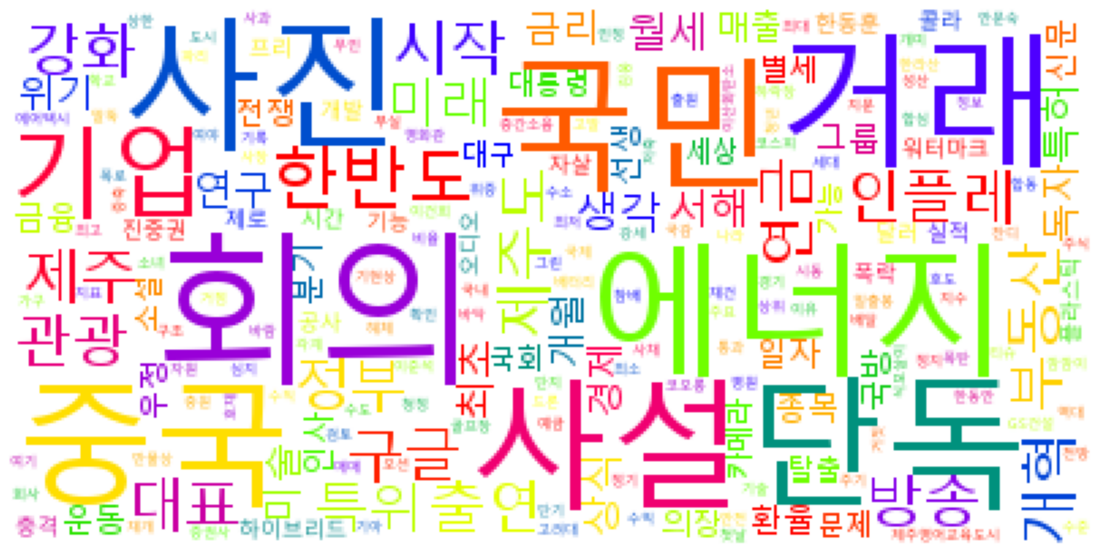

In [64]:
chosun_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(chosun_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(chosun_title_word_cloud)
plt.axis('off')

내용 토큰화수 딕셔너리 형태로 구하기

In [65]:
chosun_content_vocab = {}
chosun_preprocessed_contents = []
for sentence in whole_chosun_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in chosun_content_vocab:
                chosun_content_vocab[word] = 0 
            chosun_content_vocab[word] += 1
            chosun_preprocessed_contents.append(word) 
chosun_content_counter = Counter(chosun_preprocessed_contents)
chosun_content_counter

Counter({'로이터': 3,
         '인플레이션': 8,
         '실리콘': 1,
         '악영향': 1,
         '마이크로소프트': 8,
         '클라우드': 3,
         '알파벳': 2,
         '모회사': 1,
         '순이익': 5,
         '주당순이익': 2,
         '팬데믹': 2,
         '성장세': 2,
         '유튜브': 15,
         '연합뉴스': 7,
         '서비스': 14,
         '라이선스': 1,
         '비즈니스': 3,
         '프로세스': 3,
         '퍼스널': 2,
         '컴퓨팅': 1,
         '경영자': 1,
         '.순다르피': 1,
         '사티나델라': 1,
         '더불어민주당': 16,
         '한동훈': 8,
         '법무부': 10,
         '기자단': 5,
         '윤석열': 11,
         '대통령': 48,
         '술자리': 12,
         '진중권': 1,
         '라디오': 5,
         '경호원': 2,
         '윤도현': 1,
         '첼리스트': 2,
         '이재명': 11,
         '지지자': 1,
         '판타지': 1,
         '필터링': 1,
         '거짓말': 6,
         '청담동': 5,
         '그랜드': 1,
         '피아노': 1,
         '동백아가씨': 2,
         '매체는슈퍼챗장사하': 1,
         '민주당': 35,
         '대변인': 25,
         '김성회': 1,
         '연구소': 9,
         '김앤장': 3,
         '변

(-0.5, 399.5, 199.5, -0.5)

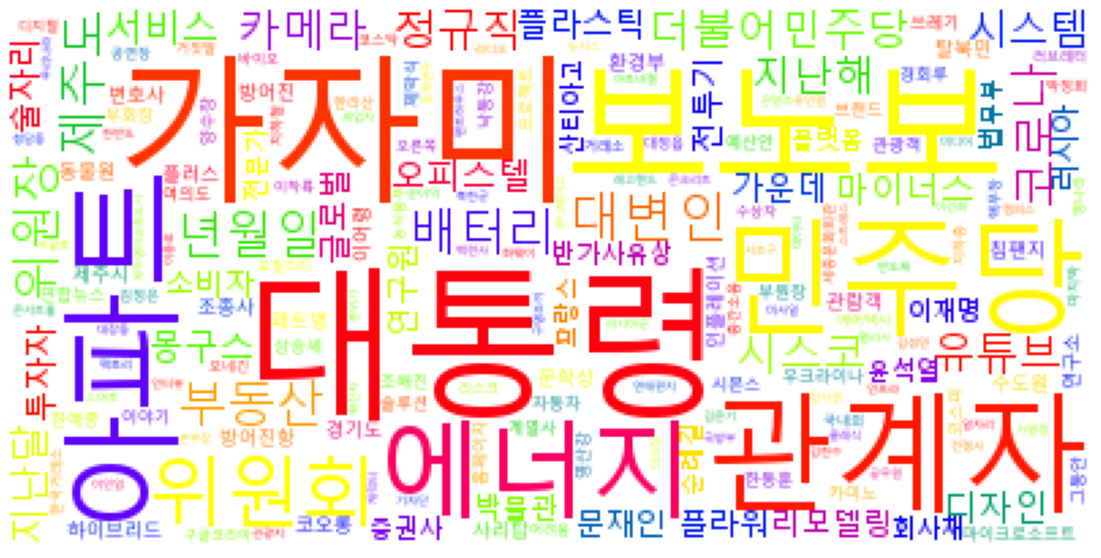

In [66]:
chosun_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(chosun_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(chosun_content_cloud)
plt.axis('off')

### 한국경제의 데이터 유사성 구하기

한국경제 신문 제목 추출하기

In [67]:
whole_korean_title_noun = []
for korean_title in korean_economy_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(korean_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 2:
                continue
            else:
                whole_korean_title_noun.append(noun)

url 데이터를 이용하여서 내용 추출하기

In [68]:
whole_korean_content_sentence_list = []
count = 1
for korean_url in korean_economy_database.tail(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(korean_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    if content_0_data == None:
        content_0_data = ""
        whole_korean_content_sentence_list.append(content_0_data)
    else:
        content_0_data = content_0_data.get_text().strip()
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_korean_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 52ms/step


한국경제 내용 추출하기

In [69]:
whole_korean_content_noun = []
count = 1
for content in whole_korean_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_korean_content_noun.append(noun)

1/1 [==============================] - 0s 52ms/step


In [70]:
korean_title_content_vocab = list(set(whole_korean_title_noun + whole_korean_content_noun))
korean_title_content_vocab.sort()

In [71]:
korean_tail_100_database = pd.DataFrame(korean_economy_database.tail(100).values, columns=korean_economy_database.columns)
korean_tail_100_database

title  \
0      코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호   
1    김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"   
2   탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'   
3     농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행   
4               서울 중구, '중구민 한마음 걷기대회' 연다   
..                                   ...   
95    [사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당   
96         [다산칼럼] '기대인플레이션' 정확한 측정이 중요하다   
97               [포토] 라필루스 샨티, '매력적인 미소'   
98               [시론] 북한의 우발적 핵 공격에 대비해야   
99                      [한경에세이] 크리에이터 세상   

                                              content  \
0   코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시...   
1   울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한...   
2   탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계...   
3   농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 ...   
4   서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이...   
..                                                ...   
95  더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 ...   
96  현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불...   
97  그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M...   
98  컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한...   
99  K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 ...   

                                                  url  
0   https://n.news.naver.com/mnews/article/015/000...  
1   https://n.news.naver.com/mnews/article/015/000...  
2   https://n.news.naver.com/mnews/article/015/000...  
3   https://n.news.naver.com/mnews/article/015/000...  
4   https://n.news.naver.com/mnews/article/015/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/015/000...  
96  https://n.news.naver.com/mnews/article/015/000...  
97  https://n.news.naver.com/mnews/article/015/000...  
98  https://n.news.naver.com/mnews/article/015/000...  
99  https://n.news.naver.com/mnews/article/015/000...  

[100 rows x 3 columns]

In [72]:
korean_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(korean_tail_100_database["title"])):
  korean_title_tfidf_result.append([])
  try:
    d = korean_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(korean_title_content_vocab)):
      korean_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(korean_title_content_vocab)):
      t = korean_title_content_vocab[j]
      korean_title_tfidf_result[-1].append(tfidf(t, d))

# len(result)
korean_title_tfidf_ = pd.DataFrame(korean_title_tfidf_result, columns=korean_title_content_vocab, index=korean_tail_100_database["title"])
korean_title_tfidf_

.고개  .교리  .담뱃  .르엘  .비더비  .수소수소  .스캐터랩  \
title                                                                          
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호     0.0  0.0  0.0  0.0   0.0    0.0    0.0   
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"   0.0  0.0  0.0  0.0   0.0    0.0    0.0   
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'  0.0  0.0  0.0  0.0   0.0    0.0    0.0   
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
서울 중구, '중구민 한마음 걷기대회' 연다              0.0  0.0  0.0  0.0   0.0    0.0    0.0   
...                                   ...  ...  ...  ...   ...    ...    ...   
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다         0.0  0.0  0.0  0.0   0.0    0.0    0.0   
[포토] 라필루스 샨티, '매력적인 미소'               0.0  0.0  0.0  0.0   0.0    0.0    0.0   
[시론] 북한의 우발적 핵 공격에 대비해야               0.0  0.0  0.0  0.0   0.0    0.0    0.0   
[한경에세이] 크리에이터 세상                      0.0  0.0  0.0  0.0   0.0    0.0    0.0   

                                      .엔젠  .주가  LG화학  ...   회복  회복세  회의실  회의장  \
title                                                 ...                       
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호     0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"   0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'  0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행    0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
서울 중구, '중구민 한마음 걷기대회' 연다              0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
...                                   ...  ...   ...  ...  ...  ...  ...  ...   
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당    0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다         0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
[포토] 라필루스 샨티, '매력적인 미소'               0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
[시론] 북한의 우발적 핵 공격에 대비해야               0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   
[한경에세이] 크리에이터 세상                      0.0  0.0   0.0  ...  0.0  0.0  0.0  0.0   

                                       회장  회장직  획기적  휴대폰   흑자  흑자냈월는  
title                                                                 
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호     0.0  0.0  0.0  0.0  0.0    0.0  
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"   0.0  0.0  0.0  0.0  0.0    0.0  
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'  0.0  0.0  0.0  0.0  0.0    0.0  
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행    0.0  0.0  0.0  0.0  0.0    0.0  
서울 중구, '중구민 한마음 걷기대회' 연다              0.0  0.0  0.0  0.0  0.0    0.0  
...                                   ...  ...  ...  ...  ...    ...  
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당    0.0  0.0  0.0  0.0  0.0    0.0  
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다         0.0  0.0  0.0  0.0  0.0    0.0  
[포토] 라필루스 샨티, '매력적인 미소'               0.0  0.0  0.0  0.0  0.0    0.0  
[시론] 북한의 우발적 핵 공격에 대비해야               0.0  0.0  0.0  0.0  0.0    0.0  
[한경에세이] 크리에이터 세상                      0.0  0.0  0.0  0.0  0.0    0.0  

[100 rows x 1530 columns]

In [73]:
korean_title_tfidf_.to_csv("korean_tail_100_title_tfidf.csv", encoding='utf-8-sig')

In [74]:
korean_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_korean_content_sentence_list)):
  korean_content_tfidf_result.append([])
  try:
    d = whole_korean_content_sentence_list[i]
  except KeyError:
    for j in range(len(korean_title_content_vocab)):
        korean_content_tfidf_result[-1].append(0)
  else:
    d2 = whole_korean_content_sentence_list[i]
    for j in range(len(korean_title_content_vocab)):
      t = korean_title_content_vocab[j]
      korean_content_tfidf_result[-1].append(tfidf(t, d2))

# len(result)
korean_content_tfidf_ = pd.DataFrame(korean_content_tfidf_result, columns=korean_title_content_vocab, index=korean_tail_100_database["content"])
korean_content_tfidf_

.고개       .교리  .담뱃  .르엘  \
content                                                                       
코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 ...  0.0  0.000000  0.0  0.0   
울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 ...  0.0  0.000000  0.0  0.0   
탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약...  0.0  0.000000  0.0  0.0   
농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 방...  0.0  0.000000  0.0  0.0   
서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이 ...  0.0  0.000000  0.0  0.0   
...                                                 ...       ...  ...  ...   
더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 오...  0.0  0.000000  0.0  0.0   
현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불확...  0.0  0.000000  0.0  0.0   
그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M ...  0.0  0.000000  0.0  0.0   
컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한다...  0.0  1.386294  0.0  0.0   
K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 종...  0.0  0.000000  0.0  0.0   

                                                        .비더비  .수소수소  .스캐터랩  \
content                                                                      
코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 ...  0.000000    0.0    0.0   
울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 ...  4.158883    0.0    0.0   
탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약...  0.000000    0.0    0.0   
농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 방...  0.000000    0.0    0.0   
서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이 ...  0.000000    0.0    0.0   
...                                                      ...    ...    ...   
더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 오...  0.000000    0.0    0.0   
현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불확...  0.000000    0.0    0.0   
그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M ...  0.000000    0.0    0.0   
컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한다...  0.000000    0.0    0.0   
K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 종...  0.000000    0.0    0.0   

                                                    .엔젠  .주가  LG화학  ...   회복  \
content                                                             ...        
코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 ...  0.0  0.0   0.0  ...  0.0   
울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 ...  0.0  0.0   0.0  ...  0.0   
탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약...  0.0  0.0   0.0  ...  0.0   
농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 방...  0.0  0.0   0.0  ...  0.0   
서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이 ...  0.0  0.0   0.0  ...  0.0   
...                                                 ...  ...   ...  ...  ...   
더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 오...  0.0  0.0   0.0  ...  0.0   
현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불확...  0.0  0.0   0.0  ...  0.0   
그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M ...  0.0  0.0   0.0  ...  0.0   
컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한다...  0.0  0.0   0.0  ...  0.0   
K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 종...  0.0  0.0   0.0  ...  0.0   

                                                    회복세  회의실       회의장  \
content                                                                  
코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 ...  0.0  0.0  0.000000   
울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 ...  0.0  0.0  0.000000   
탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약...  0.0  0.0  0.000000   
농협금융지주 손병환 회장과 임직원 봉사단 30여 명은 지난 25일 강원도 인제군을 방...  0.0  0.0  0.000000   
서울 중구는 오는 29일 중구민 한마음 걷기대회를 개최한다고 26일 밝혔다. 구민이 ...  0.0  0.0  0.000000   
...                                                 ...  ...       ...   
더불어민주당이 어제 윤석열 대통령의 예산안 국회 시정연설에 불참하면서 헌정사에 큰 오...  0.0  0.0  1.386294   
현재 세계적인 경기침체 및 금융 위기 가능성에 대한 불안감이 커지고 있다. 이런 불확...  0.0  0.0  0.000000   
그룹 라필루스 샨티가 25일 오후 서울 상암동 SBS 프리즘타워에서 열린 SBS M ...  0.0  0.0  0.000000   
컴퓨터 등 기계의 오작동이나 오판, 실수로 인한 우발적 핵전쟁의 위기는 자주 발생한다...  0.0  0.0  0.000000   
K콘텐츠의 눈부신 활약과 더불어 크리에이터는 한국 고객과 캐주얼한 대화를 나눌 때 종...  0.0  0.0  0.000000   

     

한국경제 cos_similarity 유사도 구하기

In [75]:
korean_cos_sim_tfidf = (korean_content_tfidf_.values @ korean_title_tfidf_.values.T).sum(1)/(np.linalg.norm(korean_title_tfidf_.values) * np.linalg.norm(korean_content_tfidf_.values))
korean_cos_sim_tfidf_ =pd.DataFrame(korean_cos_sim_tfidf, index = korean_tail_100_database["title"])
korean_cos_sim_tfidf_

content                               코로나19 신규 확진자가 이틀 연속 4만명을 넘겼다. 중앙방역대책본부는 26일 0시 기준 코로나19 확진자가 4만842명 늘어  …  \
title                                                                                                             
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호                                              0.003358                           
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"                                            0.000000                           
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'                                           0.000000                           
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행                                             0.000000                           
서울 중구, '중구민 한마음 걷기대회' 연다                                                       0.000000                           
...                                                                                 ...                           
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당                                             0.000000                           
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다                                                  0.000000                           
[포토] 라필루스 샨티, '매력적인 미소'                                                        0.000000                           
[시론] 북한의 우발적 핵 공격에 대비해야                                                        0.000530                           
[한경에세이] 크리에이터 세상                                                               0.000000                           

content                               울창한 수풀 사이를 걷다보면 나무 아래로 전시돼있는 운동복 브랜드가 보인다. 거대한 고목 뿌리 사이엔 화장품들이 올려져있다. 공 …  \
title                                                                                                             
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호                                              0.000353                           
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"                                            0.009190                           
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'                                           0.000177                           
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행                                             0.000000                           
서울 중구, '중구민 한마음 걷기대회' 연다                                                       0.000707                           
...                                                                                 ...                           
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당                                             0.000530                           
[다산칼럼] '기대인플레이션' 정확한 측정이 중요하다                                                  0.000530                           
[포토] 라필루스 샨티, '매력적인 미소'                                                        0.000000                           
[시론] 북한의 우발적 핵 공격에 대비해야                                                        0.001237                           
[한경에세이] 크리에이터 세상                                                               0.000177                           

content                               탑머티리얼이 180억원 규모의 리튬이온 배터리 셀 제조용 소재 핸들링 시스템 공급계약을 체결했다는 소식에 급등하고 있다. 26일 …  \
title                                                                                                             
코로나19 신규확진 이틀째 4만명대…겨울철 재유행 임박 신호                                              0.000000                           
김현우 SBA 대표 "서울의 뷰티 산업 진화 가능성 전시하겠다"                                            0.000000                           
탑머티리얼, 리튬이온 베터리 시스템 공급계약 체결 소식에 '급등'                                           0.003004                           
농협금융, 강원도 인제군 찾아 농촌 수확철 일손돕기 행사 진행                                             0.000000                           
서울 중구, '중구민 한마음 걷기대회' 연다                                                       0.000000                           
...                                                                                 ...                           
[사설] 이재명 대표 방탄 위해 나라살림까지 볼모 잡은 민주당                                             0.000000 

In [76]:
korean_cos_sim_tfidf_.to_csv("korean_tail_100_cos_sim_tfidf.csv", encoding='utf-8-sig')

한국경제 제목 토큰화한 것 딕셔너리 형태로 만들기

In [77]:
korean_whole_title_sentence = []
for korean_title in korean_tail_100_database["title"]:
    kospacing_title_list = []
    list1 = str(korean_title).split('.')
    title = ''
    for i in list1:
        title+=i
    korean_whole_title_sentence.append(title)

In [78]:
korean_title_vocab = {}
korean_preprocessed_titles = []
for sentence in korean_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) >= 2: 
            if word not in korean_title_vocab:
                korean_title_vocab[word] = 0 
            korean_title_vocab[word] += 1
            korean_preprocessed_titles.append(word)
korean_title_counter = Counter(korean_preprocessed_titles)
# print(korean_title_counter)

(-0.5, 399.5, 199.5, -0.5)

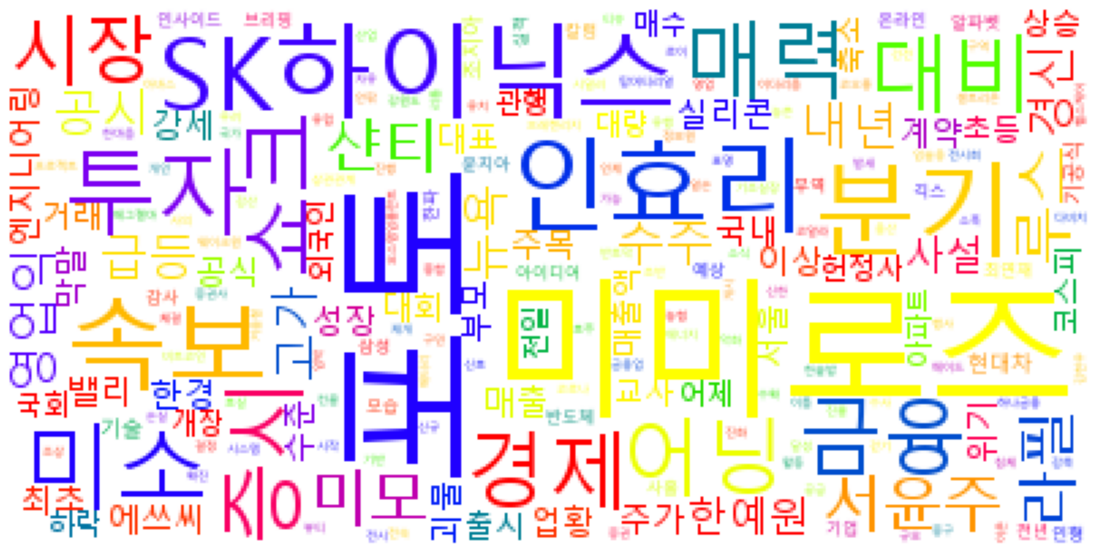

In [79]:
korean_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(korean_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(korean_title_word_cloud)
plt.axis('off')

한국경제 내용 토큰화한 것 딕셔너리 형태로 만들기

In [80]:
korean_content_vocab = {}
korean_preprocessed_contents = []
for sentence in whole_korean_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in korean_content_vocab:
                korean_content_vocab[word] = 0 
            korean_content_vocab[word] += 1
            korean_preprocessed_contents.append(word) 
korean_content_counter = Counter(korean_preprocessed_contents)
korean_content_counter

Counter({'일주일': 1,
         '용산구': 1,
         '보건소': 1,
         '진료소': 1,
         '연합뉴스': 15,
         '코로나': 10,
         '확진자': 6,
         '겨울철': 1,
         '강원명': 1,
         '사망자': 1,
         '동대문': 2,
         '비더비': 2,
         '운동복': 1,
         '브랜드': 21,
         '화장품': 3,
         '증강현실': 1,
         '헤어스타일': 1,
         '스마트': 3,
         '동대문디자인플라자': 1,
         '.비더비': 3,
         '김현우': 1,
         '진흥원': 1,
         '한국경제신문': 4,
         '인터뷰': 3,
         '소비자': 17,
         '중소기업': 7,
         '스타트업': 23,
         '지난달': 10,
         '바이오': 13,
         '필리아': 1,
         '나뭇잎': 1,
         '.세대': 1,
         '플랫폼': 40,
         '브랜디': 1,
         '그동안': 5,
         '성수동': 1,
         '스토어': 2,
         '"비더비': 1,
         '온라인': 9,
         '스타일': 1,
         '미러로이드': 1,
         '전성기': 1,
         '밀라노': 1,
         '경쟁력': 5,
         '종사자': 1,
         '부자재': 1,
         '정부관': 1,
         '클러스터': 1,
         '파급력': 1,
         '본거지': 1,
         '가로수': 1,
   

(-0.5, 399.5, 199.5, -0.5)

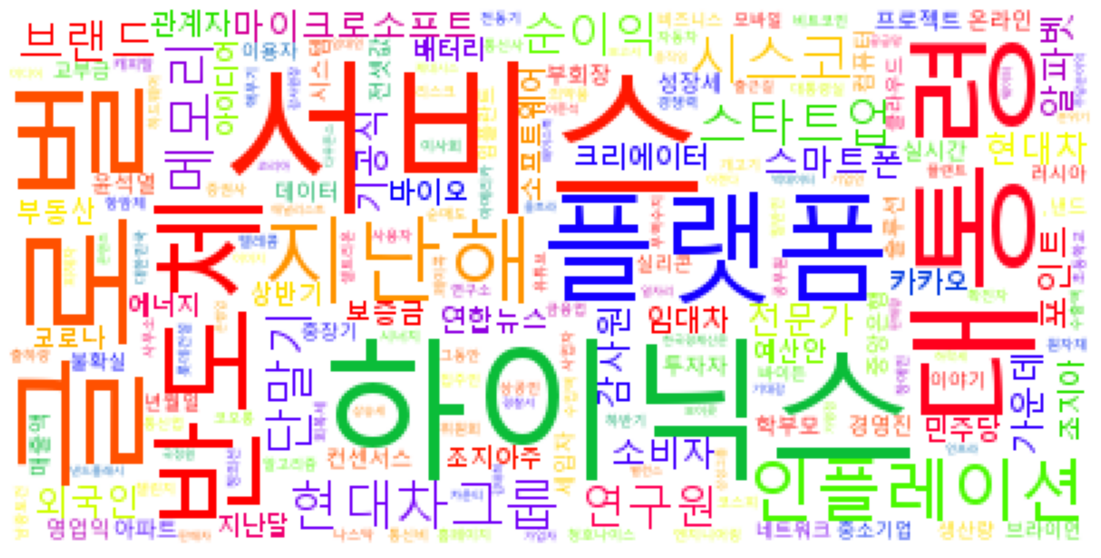

In [81]:
korean_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(korean_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(korean_content_cloud)
plt.axis('off')

### 매일경제 데이터 유사성 구하기

In [82]:
whole_mail_title_noun = []
for mail_title in mail_economy_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(mail_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_mail_title_noun.append(noun)

In [83]:
whole_mail_content_sentence_list = []
count = 1
for mail_url in mail_economy_database.tail(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(mail_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    try:
        content_0_data = content_0_data.get_text().strip()
    except AttributeError:
        whole_mail_content_sentence_list.append("")
    else:
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_mail_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 51ms/step


In [84]:
whole_mail_content_noun = []
count = 1
for content in whole_mail_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_mail_content_noun.append(noun)

1/1 [==============================] - 0s 48ms/step


In [85]:
mail_title_content_vocab = list(set(whole_mail_title_noun + whole_mail_content_noun))
mail_title_content_vocab.sort()

In [86]:
mail_tail_100_database = pd.DataFrame(mail_economy_database.tail(100).values, columns=mail_economy_database.columns)
mail_tail_100_database

title  \
0        '두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개   
1             尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나   
2        '이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"   
3   "꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]   
4              직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행   
..                                         ...   
95      [사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야   
96        대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]   
97     [사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색   
98              [오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠   
99                 [오늘의 MBN] 산에서 경마 중독 이겨낸 자연인   

                                              content  \
0   하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선...   
1   27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운...   
2   ‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설...   
3   세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세...   
4   3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한...   
..                                                ...   
95  윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환...   
96  더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 ...   
97  시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에...   
98  ■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가...   
99  ■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연...   

                                                  url  
0   https://n.news.naver.com/mnews/article/009/000...  
1   https://n.news.naver.com/mnews/article/009/000...  
2   https://n.news.naver.com/mnews/article/009/000...  
3   https://n.news.naver.com/mnews/article/009/000...  
4   https://n.news.naver.com/mnews/article/009/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/009/000...  
96  https://n.news.naver.com/mnews/article/009/000...  
97  https://n.news.naver.com/mnews/article/009/000...  
98  https://n.news.naver.com/mnews/article/009/000...  
99  https://n.news.naver.com/mnews/article/009/000...  

[100 rows x 3 columns]

In [87]:
mail_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(mail_tail_100_database["title"])):
  mail_title_tfidf_result.append([])
  try:
    d = mail_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(mail_title_content_vocab)):
      mail_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(mail_title_content_vocab)):
      t = mail_title_content_vocab[j]
      mail_title_tfidf_result[-1].append(tfidf(t, d))

# len(result)
mail_title_tfidf_ = pd.DataFrame(mail_title_tfidf_result, columns=mail_title_content_vocab, index=mail_tail_100_database["title"])
mail_title_tfidf_

"디파이  "비트코  '베이  .기후  .달러  .댄블  \
title                                                                        
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개        0.0   0.0  0.0  0.0  0.0  0.0   
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나             0.0   0.0  0.0  0.0  0.0  0.0   
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"        0.0   0.0  0.0  0.0  0.0  0.0   
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]   0.0   0.0  0.0  0.0  0.0  0.0   
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행              0.0   0.0  0.0  0.0  0.0  0.0   
...                                          ...   ...  ...  ...  ...  ...   
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야       0.0   0.0  0.0  0.0  0.0  0.0   
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]         0.0   0.0  0.0  0.0  0.0  0.0   
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색      0.0   0.0  0.0  0.0  0.0  0.0   
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠               0.0   0.0  0.0  0.0  0.0  0.0   
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                  0.0   0.0  0.0  0.0  0.0  0.0   

                                            .보드  .수소  .우준호  .채비  ...  횡단보도  \
title                                                            ...         
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개       0.0  0.0   0.0  0.0  ...   0.0   
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나            0.0  0.0   0.0  0.0  ...   0.0   
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"       0.0  0.0   0.0  0.0  ...   0.0   
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]  0.0  0.0   0.0  0.0  ...   0.0   
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행             0.0  0.0   0.0  0.0  ...   0.0   
...                                         ...  ...   ...  ...  ...   ...   
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야      0.0  0.0   0.0  0.0  ...   0.0   
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]        0.0  0.0   0.0  0.0  ...   0.0   
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색     0.0  0.0   0.0  0.0  ...   0.0   
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠              0.0  0.0   0.0  0.0  ...   0.0   
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                 0.0  0.0   0.0  0.0  ...   0.0   

                                            후강퉁  후보지  후안무치  후원금  후폭풍  휴대폰  \
title                                                                       
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개       0.0  0.0   0.0  0.0  0.0  0.0   
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나            0.0  0.0   0.0  0.0  0.0  0.0   
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"       0.0  0.0   0.0  0.0  0.0  0.0   
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]  0.0  0.0   0.0  0.0  0.0  0.0   
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행             0.0  0.0   0.0  0.0  0.0  0.0   
...                                         ...  ...   ...  ...  ...  ...   
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야      0.0  0.0   0.0  0.0  0.0  0.0   
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]        0.0  0.0   0.0  0.0  0.0  0.0   
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색     0.0  0.0   0.0  0.0  0.0  0.0   
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠              0.0  0.0   0.0  0.0  0.0  0.0   
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                 0.0  0.0   0.0  0.0  0.0  0.0   

                                            희소성  힌두교  힌두교도  
title                                                       
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개       0.0  0.0   0.0  
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나            0.0  0.0   0.0  
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"       0.0  0.0   0.0  
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]  0.0  0.0   0.0  
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행             0.0  0.0   0.0  
...                                         ...  ...   ...  
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야      0.0  0.0   0.0  
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]        0.0  0.0   0.0  
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색     0.0  0.0   0.0  
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠              0.0  0.0   0.0  
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                 0.0  0.0   0.0  

[100 rows x 1475 columns]

In [88]:
mail_title_tfidf_.to_csv("mail_tail_100_title_tfidf.csv", encoding='utf-8-sig')

In [89]:
mail_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_mail_content_sentence_list)):
  mail_content_tfidf_result.append([])
  try:
    d = whole_mail_content_sentence_list[i]
  except KeyError:
    for j in range(len(mail_title_content_vocab)):
        mail_content_tfidf_result[-1].append(0)
  else:
    for j in range(len(mail_title_content_vocab)):
      t = mail_title_content_vocab[j]
      mail_content_tfidf_result[-1].append(tfidf(t, d))

# len(result)
mail_content_tfidf_ = pd.DataFrame(mail_content_tfidf_result, columns=mail_title_content_vocab, index=mail_tail_100_database["content"])
mail_content_tfidf_

"디파이  "비트코  '베이  .기후  .달러  \
content                                                                         
하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다...   0.0   0.0  0.0  0.0  0.0   
27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 ...   0.0   0.0  0.0  0.0  0.0   
‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위...   0.0   0.0  0.0  0.0  0.0   
세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세돌...   0.0   0.0  0.0  0.0  0.0   
3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한 ...   0.0   0.0  0.0  0.0  0.0   
...                                                  ...   ...  ...  ...  ...   
윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환점...   0.0   0.0  0.0  0.0  0.0   
더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 대...   0.0   0.0  0.0  0.0  0.0   
시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에 ...   0.0   0.0  0.0  0.0  0.0   
■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가수...   0.0   0.0  0.0  0.0  0.0   
■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연인...   0.0   0.0  0.0  0.0  0.0   

                                                         .댄블  .보드  .수소  .우준호  \
content                                                                        
하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다...  0.000000  0.0  0.0   0.0   
27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 ...  0.000000  0.0  0.0   0.0   
‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위...  0.000000  0.0  0.0   0.0   
세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세돌...  0.000000  0.0  0.0   0.0   
3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한 ...  4.158883  0.0  0.0   0.0   
...                                                      ...  ...  ...   ...   
윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환점...  0.000000  0.0  0.0   0.0   
더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 대...  0.000000  0.0  0.0   0.0   
시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에 ...  0.000000  0.0  0.0   0.0   
■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가수...  0.000000  0.0  0.0   0.0   
■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연인...  0.000000  0.0  0.0   0.0   

                                                    .채비  ...  횡단보도  후강퉁  후보지  \
content                                                  ...                   
하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다...  0.0  ...   0.0  0.0  0.0   
27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 ...  0.0  ...   0.0  0.0  0.0   
‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위...  0.0  ...   0.0  0.0  0.0   
세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세돌...  0.0  ...   0.0  0.0  0.0   
3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한 ...  0.0  ...   0.0  0.0  0.0   
...                                                 ...  ...   ...  ...  ...   
윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환점...  0.0  ...   0.0  0.0  0.0   
더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 대...  0.0  ...   0.0  0.0  0.0   
시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에 ...  0.0  ...   0.0  0.0  0.0   
■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영화 '기생충', 가수...  0.0  ...   0.0  0.0  0.0   
■ 나는 자연인이다 (26일 밤 9시 10분) 산속에 터를 잡은 지 16년째인 자연인...  0.0  ...   0.0  0.0  0.0   

                                                    후안무치  후원금  후폭풍  휴대폰  희소성  \
content                                                                        
하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다...   0.0  0.0  0.0  0.0  0.0   
27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 ...   0.0  0.0  0.0  0.0  0.0   
‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위...   0.0  0.0  0.0  0.0  0.0   
세무법인 혜움 이재희 대표 경정청구 서비스 '더 낸 세금' 인기 구글 알파고와 이세돌...   0.0  0.0  0.0  0.0  0.0   
3050 직장인 남성 패션 플랫폼 댄블이 롯데백화점과 함께 남성 고객을 위해 다양한 ...   0.0  0.0  0.0  0.0  0.0   
...                                                  ...  ...  ...  ...  ...   
윤석열 대통령이 25일 국회 시정연설에서 "내년도 예산안은 건전 재정으로 가는 전환점...   0.0  0.0  0.0  0.0  0.0   
더불어민주당이 끝내 윤석열 대통령의 내년도 예산안 시정연설에 불참했다. 25일 윤 대...   0.0  0.0  0.0  0.0  0.0   
시진핑 국가주석의 집권 3기에 대한 시장 반응은 싸늘했다. 시 주석이 측근을 요직에 ...   0.0  0.0  0.0  0.0  0.0   
■ 성공다큐 최고다 (26일 저녁 6시) 오늘날 국가 경쟁력은 영

In [175]:
mail_cos_sim_tfidf = (mail_content_tfidf_.values @ mail_title_tfidf_.values.T).sum(1)/(np.linalg.norm(mail_title_tfidf_.values) * np.linalg.norm(mail_content_tfidf_.values))
mail_cos_sim_tfidf_ =pd.DataFrame(mail_cos_sim_tfidf, index = mail_tail_100_database["title"])
mail_cos_sim_tfidf_

content                                     하정우, 주지훈, 최민호, 여진구가 대한민국 청춘들의 여행을 위해 두 팔 걷고 나선다. 티빙 오리지널 '두발로 티켓팅'은 코로나 …  \
title                                                                                                                   
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개                                                     0.0                           
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나                                                          0.0                           
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"                                                     0.0                           
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]                                                0.0                           
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행                                                           0.0                           
...                                                                                       ...                           
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야                                                    0.0                           
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]                                                      0.0                           
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색                                                   0.0                           
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠                                                            0.0                           
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                                                               0.0                           

content                                     27일 윤석열 대통령 취임 후 처음으로 회의 전체가 생중계된다. 대내외적으로 어려운 경제상황에, 좀처럼 윤 대통령 지지율이 반등 …  \
title                                                                                                                   
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개                                                0.000000                           
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나                                                     0.004825                           
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"                                                0.000000                           
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]                                           0.000000                           
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행                                                      0.000000                           
...                                                                                       ...                           
[사설] 내년 예산안 건전재정 전환점, 국회 심의도 긴축 원칙 지켜야                                               0.001072                           
대통령 시정연설 거부한 민주당, 민생보다 정쟁이 우선인가 [사설]                                                 0.003217                           
[사설] 中 반시장 우려에 증시 폭락 vs 英 경제통 총리에 시장 반색                                              0.000000                           
[오늘의 매일경제TV] 노래·춤과 태권도 결합한 콘텐츠                                                       0.000000                           
[오늘의 MBN] 산에서 경마 중독 이겨낸 자연인                                                          0.000000                           

content                                     ‘이영표의 후계자’로서 축구해설계 대권 도전에 나선 ‘기호 7번’ KBS 신임 해설위원 구자철이 본격적으로 출마를 선언했다. K …  \
title                                                                                                                   
'두발로 티켓팅' 하정우·주지훈·최민호·여진구 출연…2023년 공개                                                     0.0                           
尹대통령 참석 회의 80분간 생중계 한다…무슨 주제 다루나                                                          0.0                           
'이영표 후계자' 구자철, 해설대권 출마선언…"답답해서 내가 뛴다"                                                     0.0                           
"꽁돈 얻은 기분"…부부 합심해 차린 회사에 사장님들 몰린 이유는 [인터뷰]                                                0.0                           
직장인 남성 패션 플랫폼 댄블, 롯데백화점과 콜라보 진행                                                           0.0                           
...  

In [176]:
mail_cos_sim_tfidf_.to_csv("mail_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [92]:
mail_whole_title_sentence = []
for mail_title in mail_economy_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(mail_title).split('.')
    title = ''
    for i in list1:
        title+=i
    mail_whole_title_sentence.append(title)

매일경제 제목과 내용을 토큰화하여 딕셔너리 형태로 바꾸기, 그리고 이를 시각화하기

In [93]:
mail_title_vocab = {}
mail_preprocessed_titles = []
for sentence in mail_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) >= 2: 
            if word not in mail_title_vocab:
                mail_title_vocab[word] = 0 
            mail_title_vocab[word] += 1
            mail_preprocessed_titles.append(word)
mail_title_counter = Counter(mail_preprocessed_titles)
# print(mail_title_counter)

(-0.5, 399.5, 199.5, -0.5)

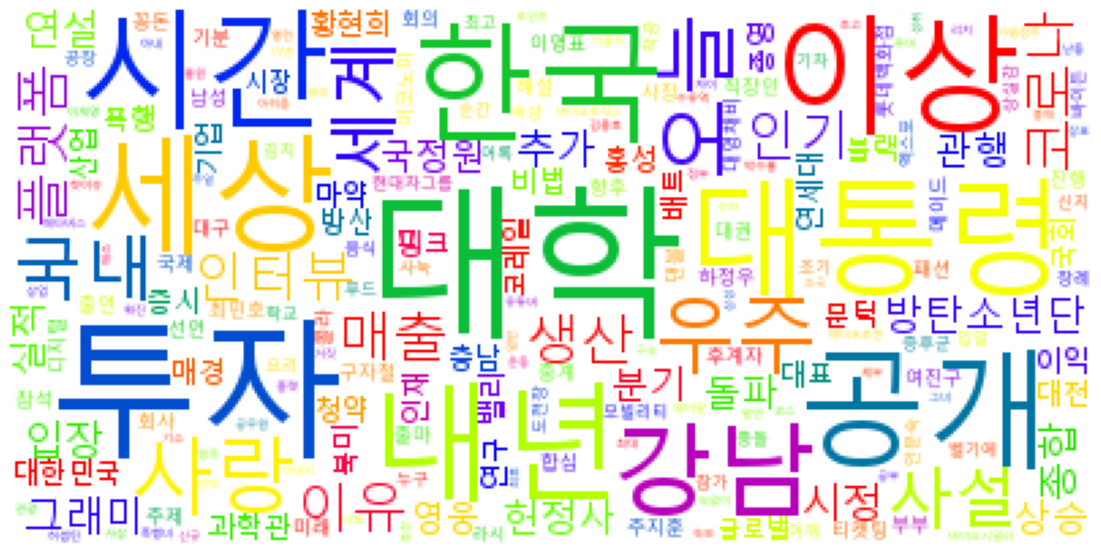

In [94]:
mail_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(mail_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(mail_title_word_cloud)
plt.axis('off')

In [95]:
mail_content_vocab = {}
mail_preprocessed_contents = []
for sentence in whole_mail_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in mail_content_vocab:
                mail_content_vocab[word] = 0 
            mail_content_vocab[word] += 1
            mail_preprocessed_contents.append(word) 
mail_content_counter = Counter(mail_preprocessed_contents)
mail_content_counter

Counter({'윤석열': 23,
         '대통령': 85,
         '대통령실': 8,
         '회의실': 3,
         '이승환': 3,
         '대내외': 3,
         '수석실': 1,
         '그동안': 5,
         '디지털': 28,
         '돌파구': 1,
         '최상목': 1,
         '전문가': 15,
         '당사자': 1,
         '박근혜': 1,
         '이야기': 7,
         '도이나': 1,
         '리스크': 7,
         '관계자': 18,
         '서비스': 96,
         '알파고': 1,
         '이세돌': 1,
         '위기감': 1,
         '스트레스': 2,
         '세무사': 17,
         '기술력': 14,
         '사업자': 12,
         '세무법인혜움이재희': 1,
         '스토리': 1,
         '현대카드': 1,
         '기업가': 1,
         '스타트업': 9,
         '입소문': 1,
         '.미처내': 1,
         '상공인': 5,
         '강남구': 5,
         '역삼동': 3,
         '사무실': 2,
         '카카오톡': 2,
         '젊은이': 1,
         '만족도': 2,
         '사업장': 2,
         '담당자': 1,
         '.혜움세무': 1,
         '택스테크': 1,
         '마찬가지': 4,
         '조력자': 1,
         '대시보드': 1,
         '지원금': 1,
         '시스템': 34,
         '.혜움': 1,
         '케이스': 1,
    

(-0.5, 399.5, 199.5, -0.5)

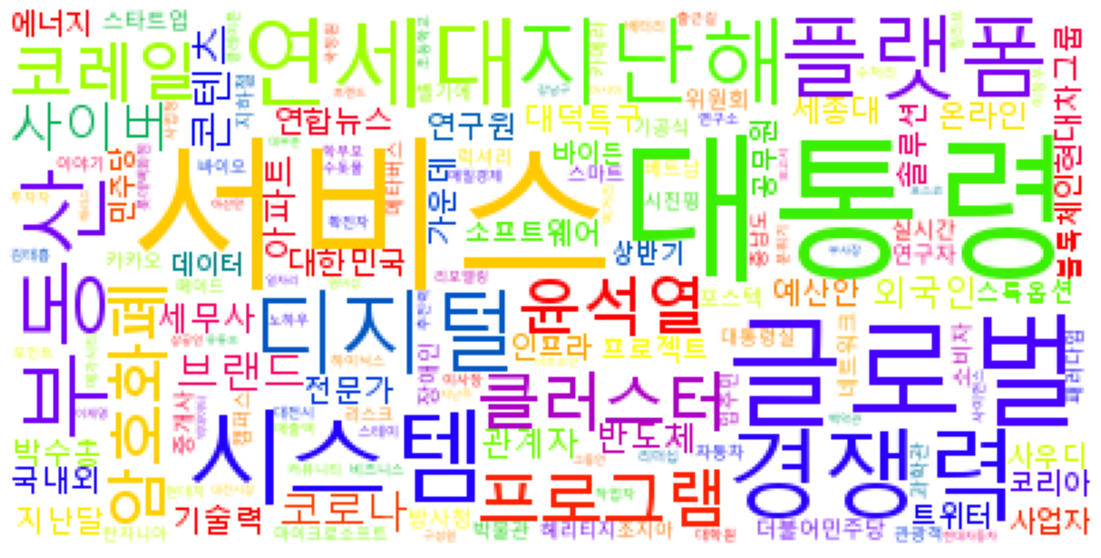

In [96]:
mail_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(mail_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(mail_content_cloud)
plt.axis('off')

### 중앙일보의 데이터 유사성 구하기

중앙일보 제목 추출하기

In [97]:
whole_middle_title_noun = []
for middle_title in midlle_eilbo_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(middle_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_middle_title_noun.append(noun)

url 데이터를 이용하여서 내용 추출하기

In [127]:
whole_middle_content_sentence_list = []
count = 1
for middle_url in midlle_eilbo_database.tail(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(middle_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    try:
        content_0_data = content_0_data.get_text().strip()
    except AttributeError:
        whole_middle_content_sentence_list.append("")
    else:
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_middle_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 33ms/step


In [128]:
whole_middle_content_noun = []
count = 1
for content in whole_middle_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_middle_content_noun.append(noun)

1/1 [==============================] - 0s 57ms/step


In [129]:
middle_title_content_vocab = list(set(whole_middle_title_noun + whole_middle_content_noun))
middle_title_content_vocab.sort()

In [130]:
middle_tail_100_database = pd.DataFrame(midlle_eilbo_database.tail(100).values, columns=midlle_eilbo_database.columns)
middle_tail_100_database

title  \
0       '尹 최측근' 조상준 국정원 기조실장, 국감 앞두고 돌연 사의   
1     비·김태희 부부, 920억에 산 빌딩 1년만에 1400억에 내놨다   
2         野 보이콧에…尹 "헌정사 하나의 관행, 어제부로 무너졌다"   
3   제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]   
4             광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사   
..                                     ...   
95       감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”   
96      홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험   
97     국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다   
98    상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”   
99   여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”   

                                              content  \
0   조상준 국가정보원 기조실장이 돌연 사의를 표명했다. 26일 국회 정보위 관계자는 "...   
1   가수 겸 배우 비(본명 정지훈)가 지난해 매입한 서울 서초동 소재의 빌딩을 1년 만...   
2   윤석열 대통령은 26일 국회 시정연설이 야당의 불참 속에 진행된 것과 관련해 "안타...   
3   사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는...   
4   경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다....   
..                                                ...   
95  감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하...   
96  40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍...   
97  이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남...   
98  최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대...   
99  국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 ...   

                                                  url  
0   https://n.news.naver.com/mnews/article/025/000...  
1   https://n.news.naver.com/mnews/article/025/000...  
2   https://n.news.naver.com/mnews/article/025/000...  
3   https://n.news.naver.com/mnews/article/025/000...  
4   https://n.news.naver.com/mnews/article/025/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/025/000...  
96  https://n.news.naver.com/mnews/article/025/000...  
97  https://n.news.naver.com/mnews/article/025/000...  
98  https://n.news.naver.com/mnews/article/025/000...  
99  https://n.news.naver.com/mnews/article/025/000...  

[100 rows x 3 columns]

In [131]:
middle_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(middle_tail_100_database["title"])):
  middle_title_tfidf_result.append([])
  try:
    d = middle_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(middle_title_content_vocab)):
      middle_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(middle_title_content_vocab)):
      t = middle_title_content_vocab[j]
      try:
        middle_title_tfidf_result[-1].append(tfidf(t, d))
      except AttributeError:
        middle_title_tfidf_result[-1].append(0)
# len(result)
middle_title_tfidf_ = pd.DataFrame(middle_title_tfidf_result, columns=middle_title_content_vocab, index=middle_tail_100_database["title"])
middle_title_tfidf_

'씨기소  .거리  .까지  .나토식  .로고와  .수소  .수평  \
title                                                                          
'尹 최측근' 조상준 국정원 기조실장, 국감 앞두고 돌연 사의       0.0  0.0  0.0   0.0   0.0  0.0  0.0   
비·김태희 부부, 920억에 산 빌딩 1년만에 1400억에 내놨다     0.0  0.0  0.0   0.0   0.0  0.0  0.0   
野 보이콧에…尹 "헌정사 하나의 관행, 어제부로 무너졌다"         0.0  0.0  0.0   0.0   0.0  0.0  0.0   
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]   0.0  0.0  0.0   0.0   0.0  0.0  0.0   
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사             0.0  0.0  0.0   0.0   0.0  0.0  0.0   
...                                      ...  ...  ...   ...   ...  ...  ...   
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”        0.0  0.0  0.0   0.0   0.0  0.0  0.0   
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험       0.0  0.0  0.0   0.0   0.0  0.0  0.0   
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다      0.0  0.0  0.0   0.0   0.0  0.0  0.0   
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”     0.0  0.0  0.0   0.0   0.0  0.0  0.0   
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”    0.0  0.0  0.0   0.0   0.0  0.0  0.0   

                                        .에서  .외설  .회수  ...  후유증  후임자  후진타오  \
title                                                  ...                   
'尹 최측근' 조상준 국정원 기조실장, 국감 앞두고 돌연 사의      0.0  0.0  0.0  ...  0.0  0.0   0.0   
비·김태희 부부, 920억에 산 빌딩 1년만에 1400억에 내놨다    0.0  0.0  0.0  ...  0.0  0.0   0.0   
野 보이콧에…尹 "헌정사 하나의 관행, 어제부로 무너졌다"        0.0  0.0  0.0  ...  0.0  0.0   0.0   
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]  0.0  0.0  0.0  ...  0.0  0.0   0.0   
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사            0.0  0.0  0.0  ...  0.0  0.0   0.0   
...                                     ...  ...  ...  ...  ...  ...   ...   
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”       0.0  0.0  0.0  ...  0.0  0.0   0.0   
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험      0.0  0.0  0.0  ...  0.0  0.0   0.0   
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다     0.0  0.0  0.0  ...  0.0  0.0   0.0   
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”    0.0  0.0  0.0  ...  0.0  0.0   0.0   
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”   0.0  0.0  0.0  ...  0.0  0.0   0.0   

                                        훈련사  휴게실  휴대폰  흥분기  희생자  히잡노이  힌두교도  
title                                                                        
'尹 최측근' 조상준 국정원 기조실장, 국감 앞두고 돌연 사의      0.0  0.0  0.0  0.0  0.0   0.0   0.0  
비·김태희 부부, 920억에 산 빌딩 1년만에 1400억에 내놨다    0.0  0.0  0.0  0.0  0.0   0.0   0.0  
野 보이콧에…尹 "헌정사 하나의 관행, 어제부로 무너졌다"        0.0  0.0  0.0  0.0  0.0   0.0   0.0  
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]  0.0  0.0  0.0  0.0  0.0   0.0   0.0  
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사            0.0  0.0  0.0  0.0  0.0   0.0   0.0  
...                                     ...  ...  ...  ...  ...   ...   ...  
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”       0.0  0.0  0.0  0.0  0.0   0.0   0.0  
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험      0.0  0.0  0.0  0.0  0.0   0.0   0.0  
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다     0.0  0.0  0.0  0.0  0.0   0.0   0.0  
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”    0.0  0.0  0.0  0.0  0.0   0.0   0.0  
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”   0.0  0.0  0.0  0.0  0.0   0.0   0.0  

[100 rows x 1986 columns]

In [132]:
middle_title_tfidf_.to_csv("middle_title_tfidf.csv", encoding='utf-8-sig')

In [133]:
middle_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_middle_content_sentence_list)):
  middle_content_tfidf_result.append([])
  try:
    d = whole_middle_content_sentence_list[i]
  except KeyError:
    for j in range(len(middle_title_content_vocab)):
        middle_content_tfidf_result[-1].append(0)
  else:
    for j in range(len(middle_title_content_vocab)):
      t = middle_title_content_vocab[j]
      middle_content_tfidf_result[-1].append(tfidf(t, d))

# len(result)
middle_content_tfidf_ = pd.DataFrame(middle_content_tfidf_result, columns=middle_title_content_vocab, index=middle_tail_100_database["content"])
middle_content_tfidf_

'씨기소  .거리  .까지  .나토식  \
content                                                                    
조상준 국가정보원 기조실장이 돌연 사의를 표명했다. 26일 국회 정보위 관계자는 "조...   0.0  0.0  0.0   0.0   
가수 겸 배우 비(본명 정지훈)가 지난해 매입한 서울 서초동 소재의 빌딩을 1년 만에...   0.0  0.0  0.0   0.0   
윤석열 대통령은 26일 국회 시정연설이 야당의 불참 속에 진행된 것과 관련해 "안타까...   0.0  0.0  0.0   0.0   
사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는 ...   0.0  0.0  0.0   0.0   
경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다. ...   0.0  0.0  0.0   0.0   
...                                                  ...  ...  ...   ...   
감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하면...   0.0  0.0  0.0   0.0   
40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍콩...   0.0  0.0  0.0   0.0   
이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남긴...   0.0  0.0  0.0   0.0   
최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대표...   0.0  0.0  0.0   0.0   
국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 불...   0.0  0.0  0.0   0.0   

                                                    .로고와  .수소  .수평       .에서  \
content                                                                        
조상준 국가정보원 기조실장이 돌연 사의를 표명했다. 26일 국회 정보위 관계자는 "조...   0.0  0.0  0.0  0.000000   
가수 겸 배우 비(본명 정지훈)가 지난해 매입한 서울 서초동 소재의 빌딩을 1년 만에...   0.0  0.0  0.0  0.000000   
윤석열 대통령은 26일 국회 시정연설이 야당의 불참 속에 진행된 것과 관련해 "안타까...   0.0  0.0  0.0  0.000000   
사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는 ...   0.0  0.0  0.0  1.386294   
경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다. ...   0.0  0.0  0.0  0.000000   
...                                                  ...  ...  ...       ...   
감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하면...   0.0  0.0  0.0  0.000000   
40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍콩...   0.0  0.0  0.0  0.000000   
이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남긴...   0.0  0.0  0.0  0.000000   
최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대표...   0.0  0.0  0.0  0.000000   
국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 불...   0.0  0.0  0.0  0.000000   

                                                    .외설  .회수  ...  후유증  후임자  \
content                                                       ...             
조상준 국가정보원 기조실장이 돌연 사의를 표명했다. 26일 국회 정보위 관계자는 "조...  0.0  0.0  ...  0.0  0.0   
가수 겸 배우 비(본명 정지훈)가 지난해 매입한 서울 서초동 소재의 빌딩을 1년 만에...  0.0  0.0  ...  0.0  0.0   
윤석열 대통령은 26일 국회 시정연설이 야당의 불참 속에 진행된 것과 관련해 "안타까...  0.0  0.0  ...  0.0  0.0   
사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는 ...  0.0  0.0  ...  0.0  0.0   
경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다. ...  0.0  0.0  ...  0.0  0.0   
...                                                 ...  ...  ...  ...  ...   
감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하면...  0.0  0.0  ...  0.0  0.0   
40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍콩...  0.0  0.0  ...  0.0  0.0   
이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남긴...  0.0  0.0  ...  0.0  0.0   
최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대표...  0.0  0.0  ...  0.0  0.0   
국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정연설에 더불어민주당이 불...  0.0  0.0  ...  0.0  0.0   

                                                    후진타오  훈련사  휴게실  휴대폰  흥분기  \
content                                                                        
조상준 국가정보원 기조실장이 돌연 사의를 표명했다. 26일 국회 정보위 관계자는 "조...   0.0  0.0  0.0  0.0  0.0   
가수 겸 배우 비(본명 정지훈)가 지난해 매입한 서울 서초동 소재의 빌딩을 1년 만에...   0.0  0.0  0.0  0.0  0.0   
윤석열 대통령은 26일 국회 시정연설이 야당의 불참 속에 진행된 것과 관련해 "안타까...   0.0  0.0  0.0  0.0  0.0   
사시사철 자연에서 제때 나는 식재료는 그 자체로 맛있는 요리다. COOKING에서는 ...   0.0  0.0  0.0  0.0  0.0   
경기 광명시 한 아파트에서 어머니와 자녀 2명 등 일가족 3명이 숨진 채 발견됐다. ...   0.0  0.0  0.0  0.0  0.0   
...                                                  ...  ...  ...  ...  ...   
감사원이 최근 전현희 국민권익위원장을 검찰에 수사 의뢰했다. 중앙일보 취재를 종합하면...   0.0  0.0  0.0  0.0  0.0   
40대 후반의 회사원 A씨는 지난해 1월 코스피200 지수와 S&P500 지수, 홍콩...   0.0  0.0  0.0  0.0  0.0   
이건희(1942~2020) 삼성 회장의 2주기 추모식을 계기로 그가 우리 사회에 남긴...   0.0  0.0  0.0  0.0  0.0   
최측근 김용 민주연구원 부원장 구속으로 정치적 위기에 직면한 이재명 더불어민주당 대표...   0.0  0.0  0.0  0.0  0.0   
국민의힘이 25일 윤석열 대통령의 새해 예산안 관련 국회 시정

중앙일보 제목과 내용의 cos_sim 유사성 구하기 

In [173]:
middle_cos_sim_tfidf = (middle_content_tfidf_.values @ middle_title_tfidf_.values.T).sum(1)/(np.linalg.norm(middle_title_tfidf_.values) * np.linalg.norm(middle_content_tfidf_.values))
middle_cos_sim_tfidf_ =pd.DataFrame(middle_cos_sim_tfidf, columns=middle_tail_100_database["content"], index = middle_tail_100_database["title"])
middle_cos_sim_tfidf_

content                                 조상준 국가정보원 기조실장이 돌연 사의를 표명했다. 26일 국회 정보위 관계자는 "조 기조실장이 전날 저녁 사의를 표명했고 이  …  \
title                                                                                                               
'尹 최측근' 조상준 국정원 기조실장, 국감 앞두고 돌연 사의                                               0.004848                           
비·김태희 부부, 920억에 산 빌딩 1년만에 1400억에 내놨다                                             0.000000                           
野 보이콧에…尹 "헌정사 하나의 관행, 어제부로 무너졌다"                                                 0.000000                           
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]                                           0.000000                           
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사                                                     0.000000                           
...                                                                                   ...                           
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”                                                0.000000                           
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험                                               0.000000                           
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다                                              0.000000                           
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”                                             0.000000                           
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”                                            0.000000                           

content                                 가수 겸 배우 비(본명 정지훈)가 지난해 매입한 서울 서초동 소재의 빌딩을 1년 만에 매물로 내놓은 것으로 알려졌다. 부동산 업 …  \
title                                                                                                               
'尹 최측근' 조상준 국정원 기조실장, 국감 앞두고 돌연 사의                                               0.000000                           
비·김태희 부부, 920억에 산 빌딩 1년만에 1400억에 내놨다                                             0.001939                           
野 보이콧에…尹 "헌정사 하나의 관행, 어제부로 무너졌다"                                                 0.000000                           
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]                                           0.000000                           
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사                                                     0.000000                           
...                                                                                   ...                           
감사원, 전현희 수사의뢰 “추미애 아들 의혹에 부적절 개입”                                                0.000000                           
홍콩H지수 급락, ELS 상품 11조원 중 6조 원금손실 위험                                               0.000000                           
국민엔 걸작 선물, 소아암 아이엔 희망…‘KH 유산’이 만들었다                                              0.000000                           
상임고문단 만나 조언 구한 이재명…당 원로들 “똘똘 뭉쳐 맞서야”                                             0.000000                           
여당 “민주당, 이재명 지키기 위해 시정연설 보이콧…민생 내팽개쳐”                                            0.000000                           

content                                 윤석열 대통령은 26일 국회 시정연설이 야당의 불참 속에 진행된 것과 관련해 "안타까운 것은 정치 상황이 어떻더라도 과거 노태우 …  \
title                                                                                                               
'尹 최측근' 조상준 국정원 기조실장, 국감 앞두고 돌연 사의                                               0.000000                           
비·김태희 부부, 920억에 산 빌딩 1년만에 1400억에 내놨다                                             0.000000                           
野 보이콧에…尹 "헌정사 하나의 관행, 어제부로 무너졌다"                                                 0.000485                           
제철 전복으로 누리는 호사, 감칠맛 넘치는 전복내장볶음 김밥 [쿠킹]                                           0.000000                           
광명 아파트서 일가족 3명 숨진 채 발견…경찰 수사                                                     0.000000                           
...                                                                                   ...                           
감사원, 전현희 수사의뢰 “추미애 아

In [174]:
middle_cos_sim_tfidf_.to_csv("middle_tail_100_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [136]:
middle_whole_title_sentence = []
for middle_title in middle_tail_100_database["title"]:
    kospacing_title_list = []
    list1 = str(middle_title).split('.')
    title = ''
    for i in list1:
        title+=i
    middle_whole_title_sentence.append(title)

중앙일보 제목 토큰화한 것 딕셔너리 형태로 만들기

In [137]:
middle_title_vocab = {}
middle_preprocessed_titles = []
for sentence in middle_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) >= 2: 
            if word not in middle_title_vocab:
                middle_title_vocab[word] = 0 
            middle_title_vocab[word] += 1
            middle_preprocessed_titles.append(word)
middle_title_counter = Counter(middle_preprocessed_titles)
print(middle_title_counter)

Counter({'기업': 6, '한국': 5, '국민': 5, '경제': 4, '서울': 4, '회장': 4, '세계': 4, '연설': 4, '보이콧': 3, '아파트': 3, '수사': 3, '이재명': 3, '단독': 3, '전기': 3, '공장': 3, '투입': 3, '오늘': 3, '리스크': 3, '사진': 3, '민주당': 3, '시정': 3, '사랑방': 3, '헌정사': 2, '전복': 2, '전술': 2, '교사': 2, '국방': 2, '장관': 2, '실수': 2, '추가': 2, '기소': 2, '현대차': 2, '기공식': 2, '지역': 2, '활성': 2, '버스': 2, '화재': 2, '전쟁': 2, '노림수': 2, '필요': 2, '논의': 2, '구속': 2, '이건희': 2, '주기': 2, '최고': 2, '수낵': 2, '총리': 2, '사망': 2, '대구': 2, '농수산물': 2, '시장': 2, '시간': 2, '사고': 2, '시진핑': 2, '무게': 2, '시작': 2, '금융': 2, '차이나': 2, '사설': 2, '국회': 2, '수소': 2, '추진': 2, '우려': 2, '정규직': 2, '한화생명': 2, '시대': 2, '금리': 2, '상품': 2, '아이': 2, '여당': 2, '의혹': 2, '측근': 1, '조상': 1, '국정원': 1, '기조실장': 1, '국감': 1, '사의': 1, '김태희': 1, '부부': 1, '빌딩': 1, '하나': 1, '관행': 1, '어제': 1, '제철': 1, '호사': 1, '감칠맛': 1, '내장': 1, '볶음': 1, '김밥': 1, '쿠킹': 1, '광명': 1, '일가족': 1, '발견': 1, '경찰': 1, '박지현': 1, '퇴진': 1, '반대': 1, '대신': 1, '전략': 1, 'SK하이닉스': 1, '분기': 1, '어닝': 1, '쇼크': 1, '영업': 1, '이익': 1, '급감': 1, '수유': 1,

(-0.5, 399.5, 199.5, -0.5)

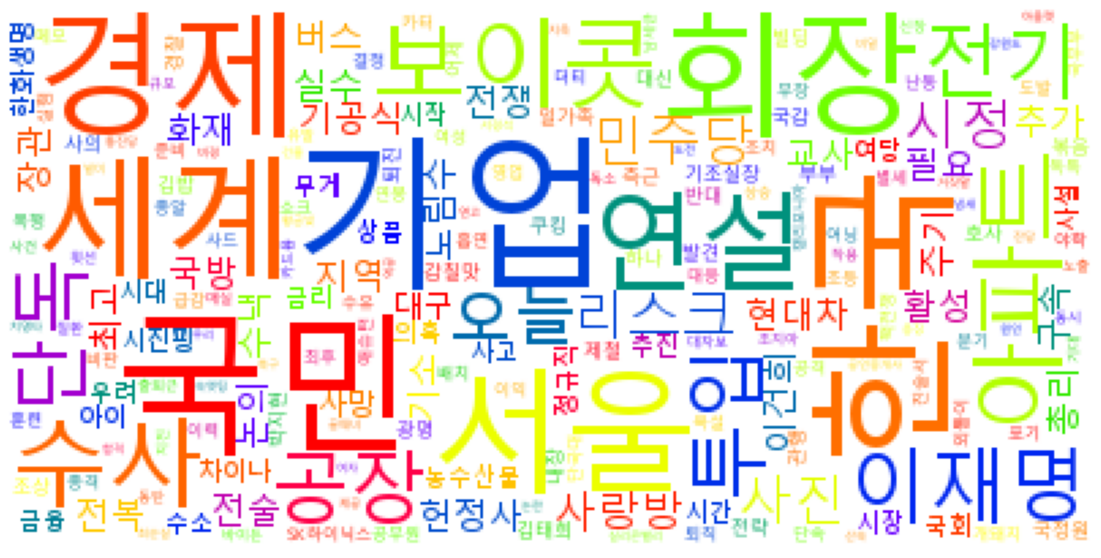

In [138]:
middle_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(middle_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(middle_title_word_cloud)
plt.axis('off')

중앙일보 내용 토큰화한 것 딕셔너리로 만들기

In [139]:
middle_content_vocab = {}
middle_preprocessed_contents = []
for sentence in whole_middle_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in middle_content_vocab:
                middle_content_vocab[word] = 0 
            middle_content_vocab[word] += 1
            middle_preprocessed_contents.append(word) 
middle_content_counter = Counter(middle_preprocessed_contents)
middle_content_counter

Counter({'지난달': 22,
         '여의도': 7,
         '위원회': 17,
         '정보원': 2,
         '기조실장': 4,
         '김경록': 2,
         '정보위': 3,
         '관계자': 35,
         '국정원': 2,
         '윤석열': 35,
         '대통령': 103,
         '대통령실': 8,
         '한동훈': 6,
         '법무부': 8,
         '서울대': 8,
         '연수원': 1,
         '검찰청': 2,
         '수사부': 2,
         '론스타': 1,
         '김태희': 4,
         '년월일': 13,
         '국제공항': 2,
         '인도네시아': 1,
         '신혼여행': 1,
         '지난해': 31,
         '서초동': 3,
         '부동산': 22,
         '주관사': 1,
         '투데이': 1,
         '강남역': 4,
         '역세권': 3,
         '지하층': 3,
         '대지면적': 1,
         '연면적': 3,
         '한의원': 1,
         '나머지': 3,
         '자산가': 1,
         '라이브': 2,
         '그동안': 6,
         '수백억': 1,
         '강남구': 3,
         '청담동': 7,
         '용산구': 8,
         '이태원동': 1,
         '재테크': 2,
         '노태우': 1,
         '헌정사': 4,
         '기자단': 3,
         '출근길': 1,
         '생명체': 1,
         '국내외': 11,
         '예산안

(-0.5, 399.5, 199.5, -0.5)

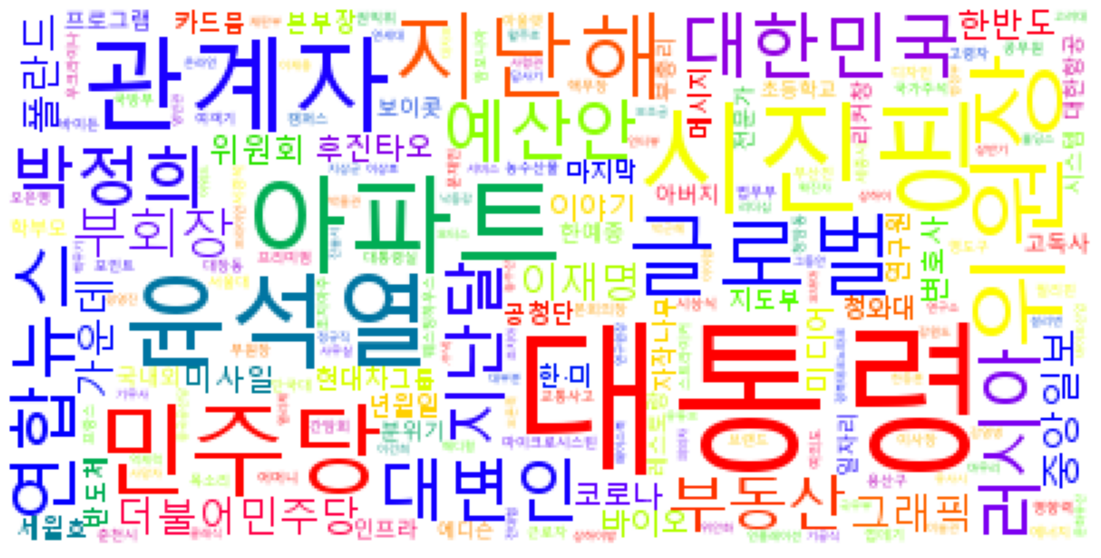

In [140]:
middle_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(middle_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(middle_content_cloud)
plt.axis('off')

### 머니투데이 데이터 유사성 구하기

머니투데이 신문 제목 추출하기

In [141]:
whole_money_title_noun = []
for money_title in money_today_database.tail(100)["title"]:
    kospacing_title_list = []
    list1 = str(money_title).split('.')
    for i in list1:
        i_1= ''
        i_1+=i
        for i_2 in i_1.split(','):
            title = ''
            title+= i_2
        kospacing_title_list.append(title)
    for title in kospacing_title_list:
        for noun in extract_noun_from_kiwi_analyzed(title):
            if len(noun) < 3:
                continue
            else:
                whole_money_title_noun.append(noun)

In [196]:
money_today_database.tail(100)["url"]

49110    https://n.news.naver.com/mnews/article/008/000...
49111    https://n.news.naver.com/mnews/article/008/000...
49112    https://n.news.naver.com/mnews/article/008/000...
49113    https://n.news.naver.com/mnews/article/008/000...
49114    https://n.news.naver.com/mnews/article/008/000...
                               ...                        
49205    https://n.news.naver.com/mnews/article/008/000...
49206    https://n.news.naver.com/mnews/article/008/000...
49207    https://n.news.naver.com/mnews/article/008/000...
49208    https://n.news.naver.com/mnews/article/008/000...
49209    https://n.news.naver.com/mnews/article/008/000...
Name: url, Length: 100, dtype: object

머니 투데이 URL 추출하기

In [201]:
whole_money_content_sentence_list = []
count = 1
for money_url in money_today_database.tail(100)["url"]:
    headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
    response_0 = requests.get(money_url, headers=headers)
    soup_0 = BeautifulSoup(response_0.text, 'html.parser')
    content_0_data = soup_0.find('div', {"id" : "dic_area"})
    try:
        content_0_data = content_0_data.get_text().strip()
    except AttributeError:
        whole_money_content_sentence_list.append("None")
    else:
        content_0_data = content_0_data.replace('\n','').replace('\t','')
        new_content_0_data = content_0_data.replace(" ", '')
        kospacing_new_content_0_data = spacing(new_content_0_data) 
        words_data = twitter.morphs(kospacing_new_content_0_data)
        with open("C:\\bigdata_git\\bigdata_thunder\\bigdata2\\korean_stopwords.txt", "r", encoding="UTF-8") as stopwords:
            stopwords_list = stopwords.read().split('\n')
        new_content_1 ='' 
        for i in korean_change_no_stop_words(words_data, stopwords_list):
            new_content_1 += i
        tokenizer3_content_1 = RegexpTokenizer('[A-Za-z0-9ㄱ-ㅎ/()]+', gaps=True)
        # tokenizer3_content_2 = RegexpTokenizer('')
        # print(tokenizer3_content_1.tokenize(new_content_1))
        regular_expression_sentence = ''
        for expression in tokenizer3_content_1.tokenize(new_content_1):
            regular_expression_sentence += expression
        whole_money_content_sentence_list.append(regular_expression_sentence)

1/1 [==============================] - 0s 76ms/step
["지난일서울강남구압구정동위치한신세계푸드대안컨셉스토어‘더베러’주한대사배우자들이‘베러미트’만든샌드위치,샐러드,미트볼,스프링롤,김밥신메뉴경험하고대안사회적가치듣는‘베러미팅’참여하고.사진:신세계푸드신세계푸드는일서울강남구압구정동운영중인대안콘셉트스토어'더베러'누적방문객개월만에명넘어섰다고밝혔다.당초예상했던방문객배넘는수치라는게신세계푸드설명이다.신세계푸드는'더베러'인기대안'베러미트'뿐라식물성음료,치즈,소스,디저트맛품질뛰어난대안식품메뉴들을경험할수있다는점사회관계망서비스통해확산되면서비건뿐라일반소비자들의방문이어지고있기때문보고.특히메뉴들이기존고기나가공햄만들어진샌드위치,샐러드비교해도떨어지지않아간편식즐기는세대~년생늘고있는도인기원인중하나로꼽았다.'더베러'열리는소모임도늘고있다고설명했다.지난일에는주한대사배우자회소속여명회원들이방문해샌드위치,미트볼,김밥,샐러드즐기고송현석신세계푸드대표게대안사회적가치듣는가졌다.신세계푸드는더배러운영오는월운영한다.대안사회적가치관심있는모임이나단체는온라인사전신청하면매장대관,메뉴할인,사회적가치강연포함된'베러미팅'프로그램참여할수.", '미국뉴욕증시거래연속강세보인가운데코스피는보합권공방벌이고.외국인나흘째순매수어가고있으나기관매도지수발목잡고.일오전시분현재코스피지수는전일대비.포인트.%오른.나타내고.투자자별로외국인나흘째순매수어가며억원매수우위다.개인도억원순매수이며기관억원매도우위다.업종별로는상승업종우세하다.의료정밀%대상승중이며약보합세인음식료,섬유의복,비금속광물,통신,금융보험서비스제외하면전업종이%미만강보합권머물고.시가총액상위종목도상승종목대부분이다.에너지솔루션삼성화학%대상승중이다.삼성현대차기아셀트리온삼성물산은강보합세다.삼성바이오직스카카오는약보합권머물고.시장기대치못미치는분기실적발표한하이닉스도강보합세보이고.코스닥지수는장초반상승출발했으나하락반전했다.현재.포인트.%내린.나타내고.코스닥에서는외국인기관억원,억원순매도나타내고.개인은억원순매수다.업종별로는섬유의류일반전기%대상승중이다.밖업종들은보합권혼조세다.코스닥시총상위

In [202]:
print(len(whole_money_content_sentence_list)) 

100


In [203]:
whole_money_content_noun = []
count = 1
for content in whole_money_content_sentence_list:
    if type(content) == float:
        continue
    else:
        noun_list = extract_noun_from_kiwi_analyzed(spacing(content))
        for noun in noun_list:
            if len(noun) < 3:
                continue
            else:
                whole_money_content_noun.append(noun)

1/1 [==============================] - 0s 97ms/step


In [204]:
money_tail_100_database = pd.DataFrame(money_today_database.tail(100).values, columns=money_today_database.columns)
money_tail_100_database

title  \
0                신세계푸드, '더 베러' 누적방문객 5000명   
1       코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등   
2         HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"   
3    [속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"   
4        [속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"   
..                                     ...   
95                        [광화문]청문회 대상은 국회다   
96                    머니투데이 오프라인 헤드라인-26일자   
97  [사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다   
98                      [MT시평]금융업의 본질은 신뢰다   
99      [투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견   

                                              content  \
0   신세계푸드는 26일 서울 강남구 압구정동에서 운영 중인 대안육 콘셉트스토어 '더 베...   
1   미국 뉴욕증시가 3거래일 연속 강세를 보인 가운데 코스피는 보합권 공방을 벌이고 있...   
2   HK이노엔이 위식도역류질환 신약 '케이캡'(성분명 테고프라잔)으로 유럽 시장 공략에...   
3                    ] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.   
4                    ] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.   
..                                                ...   
95  판이 바뀌었다. 대선을 거치며 이런저런 '사법 리스크'에 노출됐던 이재명 더불어민주...   
96  "대형증권사, 제2 채안펀드 1조 만들라" 촉법소년 '만 13세' 하향…"더 낮춰야...   
97  34만 7675건. 2020년 한해 동안 국내에서 발생한 사기 범죄 건수다. 한 시...   
98  동서증권이란 회사가 있었다. 외환위기 전에 업계 4위 정도 하던 곳인데 이 회사가 ...   
99  지난 7월말 일본의 하기우다 고이치 경제산업상은 구글 본사를 시찰한 후 기자회견을 ...   

                                                  url  
0   https://n.news.naver.com/mnews/article/008/000...  
1   https://n.news.naver.com/mnews/article/008/000...  
2   https://n.news.naver.com/mnews/article/008/000...  
3   https://n.news.naver.com/mnews/article/008/000...  
4   https://n.news.naver.com/mnews/article/008/000...  
..                                                ...  
95  https://n.news.naver.com/mnews/article/008/000...  
96  https://n.news.naver.com/mnews/article/008/000...  
97  https://n.news.naver.com/mnews/article/008/000...  
98  https://n.news.naver.com/mnews/article/008/000...  
99  https://n.news.naver.com/mnews/article/008/000...  

[100 rows x 3 columns]

In [205]:
money_title_content_vocab = list(set(whole_money_title_noun + whole_money_content_noun))
money_title_content_vocab.sort()

In [206]:
money_title_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(money_tail_100_database["title"])):
  money_title_tfidf_result.append([])
  try:
    d = money_tail_100_database["title"][i]
  except KeyError:
    for j in range(len(money_title_content_vocab)):
      money_title_tfidf_result[-1].append(0)
  else:
    for j in range(len(money_title_content_vocab)):
      t = money_title_content_vocab[j]
      try:
        money_title_tfidf_result[-1].append(tfidf(t, d))
      except AttributeError:
        money_title_tfidf_result[-1].append(0)

# len(result)
money_title_tfidf_ = pd.DataFrame(money_title_tfidf_result, columns=money_title_content_vocab, index=money_tail_100_database["title"])
money_title_tfidf_

"왓츠  -계열위  -미레  .기아  .기아차  .더리움  .루닛  \
title                                                                          
신세계푸드, '더 베러' 누적방문객 5000명               0.0   0.0  0.0  0.0   0.0   0.0  0.0   
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등      0.0   0.0  0.0  0.0   0.0   0.0  0.0   
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"        0.0   0.0  0.0  0.0   0.0   0.0  0.0   
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"   0.0   0.0  0.0  0.0   0.0   0.0  0.0   
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"       0.0   0.0  0.0  0.0   0.0   0.0  0.0   
...                                     ...   ...  ...  ...   ...   ...  ...   
[광화문]청문회 대상은 국회다                        0.0   0.0  0.0  0.0   0.0   0.0  0.0   
머니투데이 오프라인 헤드라인-26일자                    0.0   0.0  0.0  0.0   0.0   0.0  0.0   
[사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다  0.0   0.0  0.0  0.0   0.0   0.0  0.0   
[MT시평]금융업의 본질은 신뢰다                      0.0   0.0  0.0  0.0   0.0   0.0  0.0   
[투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견      0.0   0.0  0.0  0.0   0.0   0.0  0.0   

                                        .매물호가  .메탄  .무늬  ...  활용도  회복세  회사채  \
title                                                    ...                  
신세계푸드, '더 베러' 누적방문객 5000명                 0.0  0.0  0.0  ...  0.0  0.0  0.0   
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등        0.0  0.0  0.0  ...  0.0  0.0  0.0   
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"          0.0  0.0  0.0  ...  0.0  0.0  0.0   
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"     0.0  0.0  0.0  ...  0.0  0.0  0.0   
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"         0.0  0.0  0.0  ...  0.0  0.0  0.0   
...                                       ...  ...  ...  ...  ...  ...  ...   
[광화문]청문회 대상은 국회다                          0.0  0.0  0.0  ...  0.0  0.0  0.0   
머니투데이 오프라인 헤드라인-26일자                      0.0  0.0  0.0  ...  0.0  0.0  0.0   
[사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다    0.0  0.0  0.0  ...  0.0  0.0  0.0   
[MT시평]금융업의 본질은 신뢰다                        0.0  0.0  0.0  ...  0.0  0.0  0.0   
[투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견        0.0  0.0  0.0  ...  0.0  0.0  0.0   

                                        회증회  획기적  효자손  후보군  후순위채  휴대폰  희로애락  
title                                                                        
신세계푸드, '더 베러' 누적방문객 5000명               0.0  0.0  0.0  0.0   0.0  0.0   0.0  
코스피, 美 증시 훈풍에도 보합권 혼조...티슈진 14% 급등      0.0  0.0  0.0  0.0   0.0  0.0   0.0  
HK이노엔, 신약 케이캡 유럽 공략 시동…"치료효과 입증"        0.0  0.0  0.0  0.0   0.0  0.0   0.0  
[속보]尹대통령 "국회 신뢰 약해지는거 아닌가…좋은 관행 지켜져야"   0.0  0.0  0.0  0.0   0.0  0.0   0.0  
[속보]尹대통령 "앞으로 시정연설 불참 종종 생기지 않겠나"       0.0  0.0  0.0  0.0   0.0  0.0   0.0  
...                                     ...  ...  ...  ...   ...  ...   ...  
[광화문]청문회 대상은 국회다                        0.0  0.0  0.0  0.0   0.0  0.0   0.0  
머니투데이 오프라인 헤드라인-26일자                    0.0  0.0  0.0  0.0   0.0  0.0   0.0  
[사기의 세계]"하루 300만원 수익" 달콤한 유혹에 수천만원 날렸다  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
[MT시평]금융업의 본질은 신뢰다                      0.0  0.0  0.0  0.0   0.0  0.0   0.0  
[투데이 窓] 일본정부, 실리콘밸리에 1000명의 창업가 파견      0.0  0.0  0.0  0.0   0.0  0.0   0.0  

[100 rows x 1333 columns]

In [207]:
money_title_tfidf_.to_csv("money_tail_100_title_tfidf.csv", encoding='utf-8-sig')

In [208]:
money_content_tfidf_result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(len(whole_money_content_sentence_list)):
  money_content_tfidf_result.append([])
  try:
    d = whole_money_content_sentence_list[i]
  except KeyError:
    for j in range(len(money_title_content_vocab)):
      money_content_tfidf_result[-1].append(0)
  else:
    for j in range(len(money_title_content_vocab)):
      t = money_title_content_vocab[j]
      money_content_tfidf_result[-1].append(tfidf(t, d))
# print(len(whole_money_content_sentence_list))
# print(len(money_content_tfidf_result))
money_content_tfidf_ = pd.DataFrame(money_content_tfidf_result, columns=money_title_content_vocab)
money_content_tfidf_

"왓츠      -계열위  -미레  .기아  .기아차  .더리움  .루닛  .매물호가  .메탄  .무늬  ...  활용도  회복세  \
0   0.0  0.000000  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   
1   0.0  0.000000  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   
2   0.0  1.386294  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   
3   0.0  0.000000  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   
4   0.0  0.000000  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   
..  ...       ...  ...  ...   ...   ...  ...    ...  ...  ...  ...  ...  ...   
95  0.0  0.000000  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   
96  0.0  0.000000  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   
97  0.0  0.000000  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   
98  0.0  0.000000  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   
99  0.0  0.000000  0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  ...  0.0  0.0   

         회사채  회증회  획기적  효자손  후보군  후순위채  휴대폰  희로애락  
0   0.000000  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
1   0.000000  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
2   0.000000  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
3   0.000000  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
4   0.000000  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
..       ...  ...  ...  ...  ...   ...  ...   ...  
95  0.000000  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
96  0.000000  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
97  0.000000  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
98  1.386294  0.0  0.0  0.0  0.0   0.0  0.0   0.0  
99  0.000000  0.0  0.0  0.0  0.0   0.0  0.0   0.0  

[100 rows x 1333 columns]

머니투데이 제목과 내용의 cos_sim 유사성 구하기

In [209]:
money_cos_sim_tfidf = (money_content_tfidf_.values @ money_title_tfidf_.values.T).sum(1)/(np.linalg.norm(money_title_tfidf_.values) * np.linalg.norm(money_content_tfidf_.values))
money_cos_sim_tfidf_ =pd.DataFrame(money_cos_sim_tfidf, columns=money_tail_100_database["content"])
money_cos_sim_tfidf_

content  신세계푸드는 26일 서울 강남구 압구정동에서 운영 중인 대안육 콘셉트스토어 '더 베러'(The Better)의 누적 방문객이 3 …  \
0                                                 0.005426                           
1                                                 0.000000                           
2                                                 0.000000                           
3                                                 0.000000                           
4                                                 0.000000                           
..                                                     ...                           
95                                                0.000000                           
96                                                0.000000                           
97                                                0.000000                           
98                                                0.000000                           
99                                                0.000000                           

content  미국 뉴욕증시가 3거래일 연속 강세를 보인 가운데 코스피는 보합권 공방을 벌이고 있다. 외국인이 나흘째 순매수를 이어가고 있으나 …  \
0                                                 0.000000                           
1                                                 0.001206                           
2                                                 0.000000                           
3                                                 0.000000                           
4                                                 0.000000                           
..                                                     ...                           
95                                                0.000000                           
96                                                0.000000                           
97                                                0.000000                           
98                                                0.000000                           
99                                                0.000000                           

content  HK이노엔이 위식도역류질환 신약 '케이캡'(성분명 테고프라잔)으로 유럽 시장 공략에 본격적으로 나선다. HK이노엔은 최근 유럽  …  \
0                                                  0.00000                           
1                                                  0.00000                           
2                                                  0.00844                           
3                                                  0.00000                           
4                                                  0.00000                           
..                                                     ...                           
95                                                 0.00000                           
96                                                 0.00000                           
97                                                 0.00000                           
98                                                 0.00000                           
99                                                 0.00000                           

content  ] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.  ] 윤석열 대통령 26일 용산 대통령실 출근길 질의 응답.  \
0                                0.000000                          0.000000   
1                                0.000000                          0.000000   
2                                0.000000                          0.000000   
3                                0.001206                          0.001206   
4                                0.001206                          0.001206   
..                                    ...                               ...   
95                               0.003617                          0.003617   
96                               0.000603                          0.000603   
97                               0.000000                          0.000000   
98                               0.000000                          0.000000   
99                              

In [216]:
money_cos_sim_tfidf_.to_csv("money_tail_100_cos_sim_tfidf.csv", encoding='utf-8-sig')

In [211]:
money_whole_title_sentence = []
for money_title in money_tail_100_database["title"]:
    kospacing_title_list = []
    list1 = str(money_title).split('.')
    title = ''
    for i in list1:
        title+=i
    money_whole_title_sentence.append(title)

머니투데이 제목 토큰화한 것 딕셔너리 형태로 만들기

In [212]:
money_title_vocab = {}
money_preprocessed_titles = []
for sentence in money_whole_title_sentence:
    # 단어 토큰화
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in money_title_vocab:
                money_title_vocab[word] = 0 
            money_title_vocab[word] += 1
            money_preprocessed_titles.append(word)
money_title_counter = Counter(money_preprocessed_titles)
# print(money_title_counter)

(-0.5, 399.5, 199.5, -0.5)

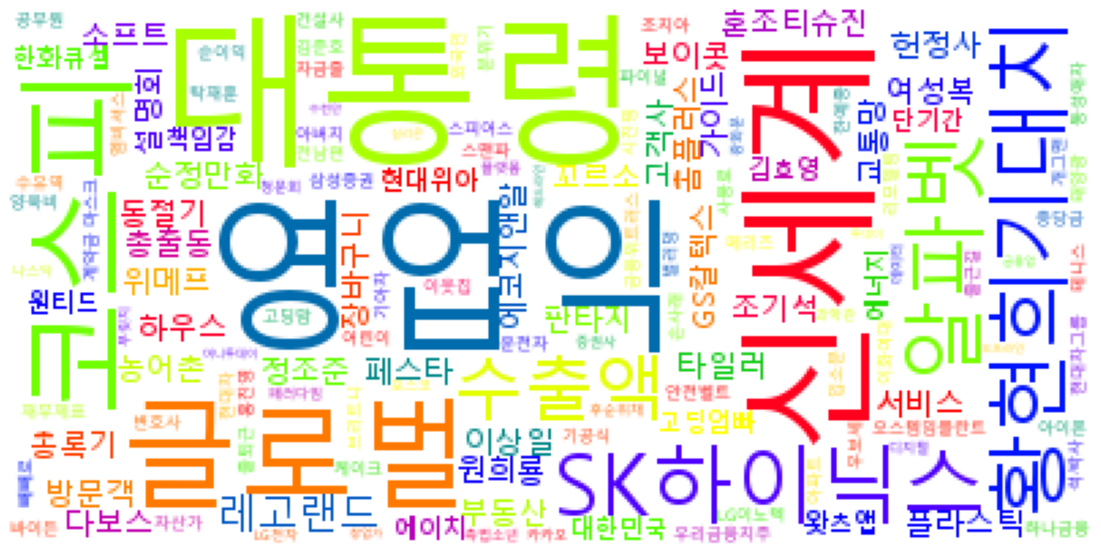

In [213]:
money_title_word_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(money_title_counter)
plt.figure(figsize=(20, 10))
plt.imshow(money_title_word_cloud)
plt.axis('off')

머니투데이 내용 토큰화한 것 딕셔너리 형태로 만들기

In [214]:
money_content_vocab = {}
money_preprocessed_contents = []
for sentence in whole_money_content_sentence_list:
    tokenized_word = extract_noun_from_kiwi_analyzed(sentence)
    for word in tokenized_word: 
        if len(word) > 2: 
            if word not in money_content_vocab:
                money_content_vocab[word] = 0 
            money_content_vocab[word] += 1
            money_preprocessed_contents.append(word) 
money_content_counter = Counter(money_preprocessed_contents)
money_content_counter

Counter({'강남구': 5,
         '압구정동': 2,
         '스토어': 5,
         '더베러': 4,
         '배우자': 1,
         '베러미트': 2,
         '샌드위치': 3,
         '샐러드': 5,
         '미트볼': 2,
         '스프링': 1,
         '신세계': 4,
         '콘셉트': 3,
         '방문객': 2,
         '디저트': 1,
         '사회관계망': 3,
         '서비스': 35,
         '소비자': 4,
         '온라인': 5,
         '프로그램': 14,
         '가운데': 16,
         '코스피': 10,
         '외국인': 15,
         '포인트': 21,
         '투자자': 21,
         '약보합': 3,
         '강보합': 3,
         '에너지': 31,
         '솔루션': 12,
         '현대차': 16,
         '셀트리온': 3,
         '삼성물산': 3,
         '바이오': 3,
         '하이닉스': 13,
         '코스닥': 6,
         '순매도': 2,
         '엘앤에프': 1,
         '대상승중이며에코프로비엠': 1,
         '에코프로': 1,
         '카카오': 6,
         '코오롱': 1,
         '나스닥': 6,
         '오스트리아': 2,
         '소화기': 4,
         '담당자': 2,
         '케이캡': 1,
         '프라자': 6,
         '이노엔은최근유럽헬리코박터학회': 1,
         '-계열위': 1,
         '가천대': 3,
         '길병원': 1,
    

(-0.5, 399.5, 199.5, -0.5)

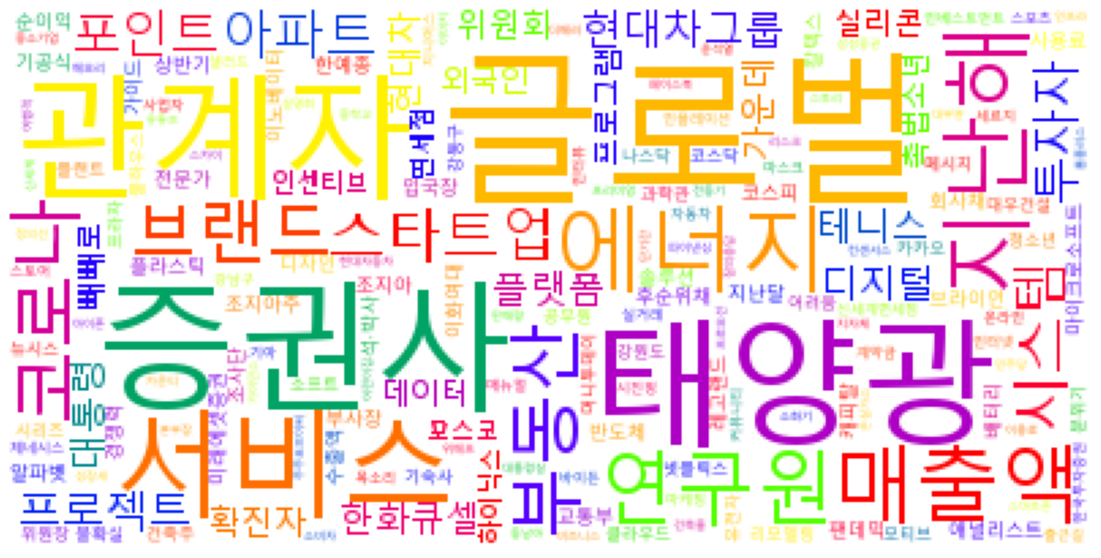

In [215]:
money_content_cloud = WordCloud(
    font_path='malgun',
    background_color='white',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(money_content_counter)
plt.figure(figsize=(20, 10))
plt.imshow(money_content_cloud)
plt.axis('off')